In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import warnings

# Set the warning filter to "ignore" to suppress all warnings
warnings.filterwarnings("ignore")

# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [3]:
identity_data = pd.read_csv("train_identity.csv")
transaction_data = pd.read_csv("train_transaction.csv")

In [4]:
sample = pd.read_csv("sample_submission.csv")
test_identity = pd.read_csv("test_identity.csv")
test_transaction = pd.read_csv("test_transaction.csv")

merged_test = pd.merge(test_transaction,test_identity, on = "TransactionID", how="left")
merged_test.shape

(506691, 433)

# Checking null value percentages

In [5]:
merged = pd.merge(transaction_data,identity_data, on = "TransactionID", how="left")
merged.shape

(590540, 434)

In [6]:
merged_null_percentages = pd.DataFrame((merged.isnull().sum()/len(merged))*100,columns = ['percentage'])
remove_features_merged = merged_null_percentages[merged_null_percentages['percentage']>40].index

#Columns count to be removed
print("Total count of columns to be removed:",len(remove_features_merged))

# Total number of fields
print("Total count of columns in transaction data:",len(merged_null_percentages))

Total count of columns to be removed: 232
Total count of columns in transaction data: 434


In [7]:
# Removing the columns which have more than 40% null values in it
merged.drop(remove_features_merged,axis=1,inplace=True)

In [8]:
# Rename columns by replacing '-' with '_'
merged_test.rename(columns=lambda x: x.replace('-', '_'), inplace=True)

# Removing the columns which have more than 40% null values in it
merged_test.drop(remove_features_merged,axis=1,inplace=True)

##### As the dataset is empty it means that we don't have any data which has more than 30% null values. Now we will check the data distribution and work on treating the null values through imputations.

In [9]:
# Separating continuous and random column names
categorical_features_merged = []

for i in merged.columns:
    if merged[i].dtype == "object":
        categorical_features_merged.append(i)

continuous_features_merged = [elem for elem in merged.columns if elem not in categorical_features_merged]

In [10]:
# Separating continuous and random column names
categorical_features_merged_test = []

for i in merged_test.columns:
    if merged_test[i].dtype == "object":
        categorical_features_merged_test.append(i)

continuous_features_merged_test = [elem for elem in merged_test.columns if elem not in categorical_features_merged_test]

# Converting categorical data into numbers using LabelEncoders

In [11]:
# Converting all categorical information to numbers by encoding them
for column in categorical_features_merged:
    if merged[column].dtype == 'O':
        le = preprocessing.LabelEncoder()
        merged[column] = le.fit_transform(merged[column])

In [12]:
# Converting all categorical information to numbers by encoding them
for column in categorical_features_merged_test:
    if merged_test[column].dtype == 'O':
        le = preprocessing.LabelEncoder()
        merged_test[column] = le.fit_transform(merged_test[column])

# Null value treatment

In [13]:
(merged.isnull().sum()/len(merged)).sort_values(ascending=False)*100

V39               28.612626
V46               28.612626
V40               28.612626
V52               28.612626
V51               28.612626
V50               28.612626
V49               28.612626
V48               28.612626
V47               28.612626
V45               28.612626
V44               28.612626
V43               28.612626
V42               28.612626
V41               28.612626
V35               28.612626
V36               28.612626
V37               28.612626
V38               28.612626
D4                28.604667
V75               15.098723
V80               15.098723
V78               15.098723
V81               15.098723
V83               15.098723
V84               15.098723
V85               15.098723
V86               15.098723
V87               15.098723
V88               15.098723
V79               15.098723
V77               15.098723
V76               15.098723
V89               15.098723
V90               15.098723
V91               15.098723
V92               15

In [14]:
cat_merged = merged[categorical_features_merged].fillna(merged[categorical_features_merged].mode())
cont_merged = merged[continuous_features_merged].fillna(merged[continuous_features_merged].mean())

In [15]:
# Concatenate horizontally (joining columns)
merged_imputed = pd.concat([cat_merged, cont_merged], axis=1)

In [16]:
merged_imputed.isnull().sum().sort_values(ascending=False)

ProductCD         0
V117              0
V107              0
V108              0
V109              0
V110              0
V111              0
V112              0
V113              0
V114              0
V115              0
V116              0
V118              0
V130              0
V119              0
V120              0
V121              0
V122              0
V123              0
V124              0
V125              0
V126              0
V127              0
V128              0
V106              0
V105              0
V104              0
V103              0
V82               0
V83               0
V84               0
V85               0
V86               0
V87               0
V88               0
V89               0
V90               0
V91               0
V92               0
V93               0
V94               0
V95               0
V96               0
V97               0
V98               0
V99               0
V100              0
V101              0
V102              0
V129              0


In [17]:
cat_merged_test = merged_test[categorical_features_merged_test].fillna(merged_test[categorical_features_merged_test].mode())
cont_merged_test = merged_test[continuous_features_merged_test].fillna(merged_test[continuous_features_merged_test].mean())

# Concatenate horizontally (joining columns)
merged_test_imputed = pd.concat([cat_merged_test, cont_merged_test], axis=1)

In [18]:
merged_test_imputed.isnull().sum().sort_values(ascending=False)

ProductCD         0
V118              0
V108              0
V109              0
V110              0
V111              0
V112              0
V113              0
V114              0
V115              0
V116              0
V117              0
V119              0
V81               0
V120              0
V121              0
V122              0
V123              0
V124              0
V125              0
V126              0
V127              0
V128              0
V129              0
V107              0
V106              0
V105              0
V104              0
V83               0
V84               0
V85               0
V86               0
V87               0
V88               0
V89               0
V90               0
V91               0
V92               0
V93               0
V94               0
V95               0
V96               0
V97               0
V98               0
V99               0
V100              0
V101              0
V102              0
V103              0
V130              0


In [19]:
X = merged_imputed.drop('isFraud',axis=1)
y = merged_imputed['isFraud']

# Perform an 80-20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression

In [19]:
# Initialize and fit the logistic regression model on the training data
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test)

# Now you can evaluate the model's performance using metrics like accuracy, precision, recall, etc.
# For example, using accuracy:
accuracy = logreg.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9638127815219968


# Performance of the model

In [20]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Confusion Matrix:
[[113830     36]
 [  4238      4]]
Precision: 0.1
Recall: 0.000942951438000943
F1 Score: 0.0018682858477347035


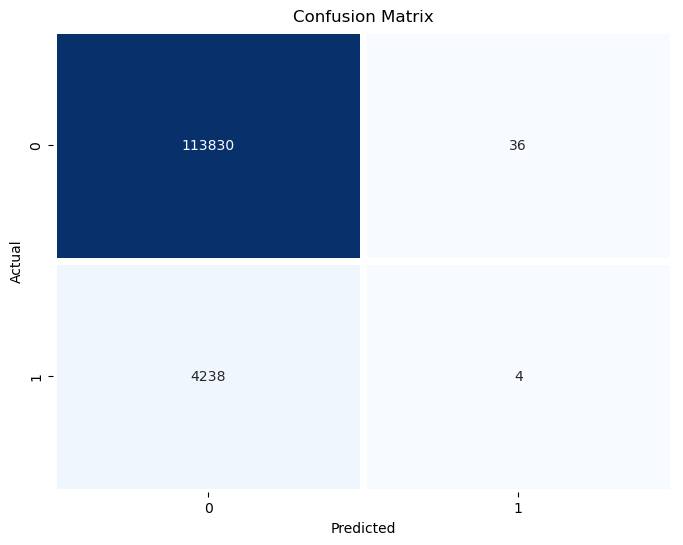

In [21]:
# Visualize the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False, linewidths=5)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve

AUC Score: 0.645638744427524


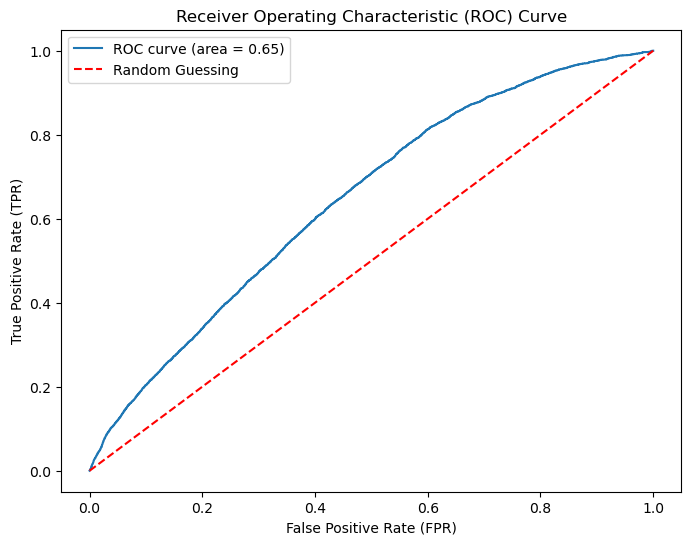

In [22]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities on the test set
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

# Calculate the fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC score
auc = roc_auc_score(y_test, y_pred_proba)
print("AUC Score:", auc)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'r--', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

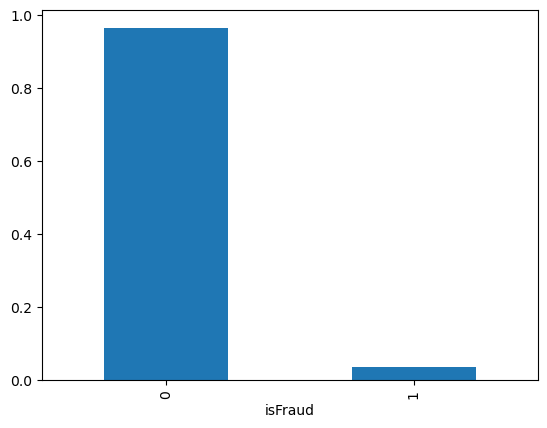

In [23]:
# Visualizing the imbalance in the dataset
temp_ser = y.value_counts(normalize=True)
temp_ser.plot(kind='bar')
plt.xlabel('isFraud')
plt.show()

#### Clearly, the data is very imbalanced and we need to improve the F-1 score to improve the model. Also, AUC curves shows that the model is not classifying the fraud cases properly as it is very close to 0.5. We need AUC scores more than 0.85 to create a better model to detect fraud cases.

# Treating imbalance in the dataset

In [24]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


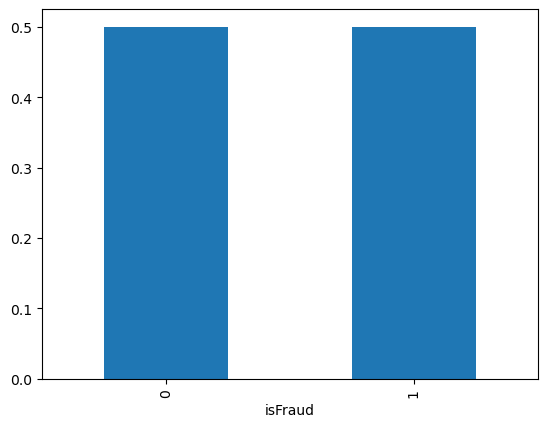

In [25]:
# Visualizing the imbalance in the dataset
temp_ser = y_resampled.value_counts(normalize=True)
temp_ser.plot(kind='bar')
plt.xlabel('isFraud')
plt.show()

In [26]:
# Perform an 80-20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [27]:
# Initialize and fit the logistic regression model on the training data
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test)

# Now you can evaluate the model's performance using metrics like accuracy, precision, recall, etc.
# For example, using accuracy:
accuracy = logreg.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.5092059258349382


In [28]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Confusion Matrix:
[[58674 55260]
 [56617 57400]]
Precision: 0.5094976034084857
Recall: 0.5034336984835595
F1 Score: 0.5064475001874915


AUC Score: 0.5226954146699447


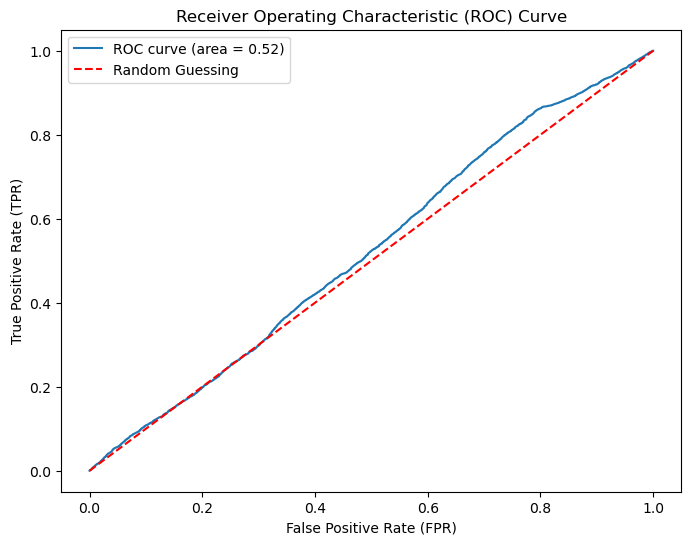

In [29]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities on the test set
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

# Calculate the fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC score
auc = roc_auc_score(y_test, y_pred_proba)
print("AUC Score:", auc)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'r--', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Clearly, SMOTE is using oversampling technique to treat the imbalance increasing the minority records. As we can see the logistic regression is performing really poor treating the imbalance in the dataset. Hence we will use some other models which treats the imbalance on the fly and will create a weight system for the same.

In [30]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.metrics import classification_report, confusion_matrix

# Assume 'X' is your feature matrix and 'y' is your target variable
X = merged_imputed.drop('isFraud',axis=1)
y = merged_imputed['isFraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Check the class distribution in the training set
class_counts = pd.Series(y_train).value_counts()
print("Class Distribution in Training Set:")
print(class_counts)

# Upsample the minority class using resampling
X_train_resampled, y_train_resampled = resample(X_train[y_train == 1], y_train[y_train == 1],
                                                replace=True, n_samples=class_counts[0], random_state=42)

X_train_balanced = np.vstack((X_train[y_train == 0], X_train_resampled))
y_train_balanced = np.concatenate((y_train[y_train == 0], y_train_resampled))

# Shuffle the balanced training set
shuffle_indices = np.random.permutation(len(X_train_balanced))
X_train_balanced = X_train_balanced[shuffle_indices]
y_train_balanced = y_train_balanced[shuffle_indices]

# Initialize logistic regression with balanced class weights
logreg = LogisticRegression(class_weight="balanced", random_state=42)

# Train the model on the balanced training set
logreg.fit(X_train_balanced, y_train_balanced)

# Make predictions on the test set
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

auc = roc_auc_score(y_test, y_pred_proba)
print("AUC Score:", auc)


Class Distribution in Training Set:
0    456011
1     16421
Name: isFraud, dtype: int64
Confusion Matrix:
[[88789 25077]
 [ 1119  3123]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.78      0.87    113866
           1       0.11      0.74      0.19      4242

    accuracy                           0.78    118108
   macro avg       0.55      0.76      0.53    118108
weighted avg       0.96      0.78      0.85    118108

Precision: 0.11074468085106383
Recall: 0.7362093352192363
F1 Score: 0.19252820417976696
AUC Score: 0.8360488961718512


AUC Score: 0.8360488961718512


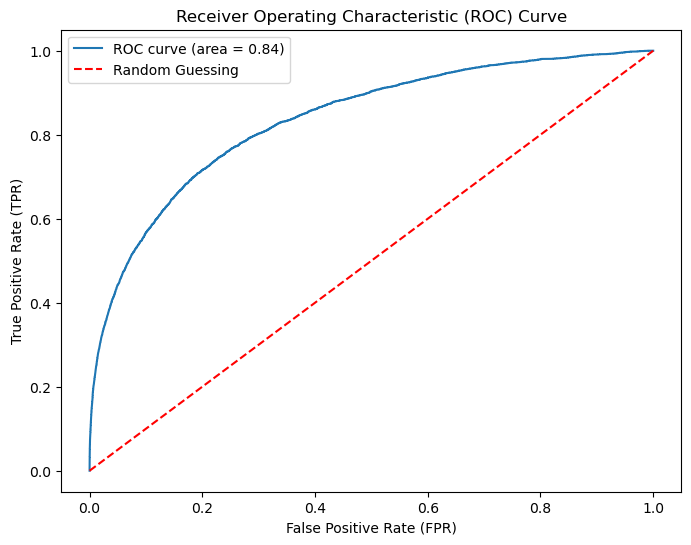

In [31]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities on the test set
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

# Calculate the fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC score
auc = roc_auc_score(y_test, y_pred_proba)
print("AUC Score:", auc)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'r--', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [32]:
# TO obtain output file
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.metrics import classification_report, confusion_matrix

X_test = merged_test_imputed

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_test = scaler.transform(X_test)

# Check the class distribution in the training set
class_counts = pd.Series(y).value_counts()
print("Class Distribution in Training Set:")
print(class_counts)

# Upsample the minority class using resampling
X_resampled, y_resampled = resample(X[y == 1], y[y == 1],
                                                replace=True, n_samples=class_counts[0], random_state=42)

X_train_balanced = np.vstack((X[y == 0], X_resampled))
y_train_balanced = np.concatenate((y[y == 0], y_resampled))

# Shuffle the balanced training set
shuffle_indices = np.random.permutation(len(X_train_balanced))
X_train_balanced = X_train_balanced[shuffle_indices]
y_train_balanced = y_train_balanced[shuffle_indices]

# Initialize logistic regression with balanced class weights
logreg = LogisticRegression(class_weight="balanced", random_state=42)

# Train the model on the balanced training set
logreg.fit(X_train_balanced, y_train_balanced)

# Make predictions on the test set
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

y_ = pd.DataFrame(y_pred_proba)
output = pd.concat([merged_test_imputed['TransactionID'],y_],axis=1)
output.to_csv('Output.csv')

Class Distribution in Training Set:
0    569877
1     20663
Name: isFraud, dtype: int64


This ouput gave a public score of 86.131%

In [41]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Assume 'X' is your feature matrix and 'y' is your target variable
X = merged_imputed.drop('isFraud',axis=1)
y = merged_imputed['isFraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Example: Balanced Random Forest
model = BalancedRandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

auc = roc_auc_score(y_test, y_pred_proba)
print("AUC Score:", auc)

Confusion Matrix:
[[99703 14163]
 [  695  3547]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.88      0.93    113866
           1       0.20      0.84      0.32      4242

    accuracy                           0.87    118108
   macro avg       0.60      0.86      0.63    118108
weighted avg       0.96      0.87      0.91    118108

Precision: 0.2002823263692829
Recall: 0.8361621876473362
F1 Score: 0.32315962099125367
AUC Score: 0.9303587039740077


In [42]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Assume 'X' is your feature matrix and 'y' is your target variable
X = merged_imputed.drop('isFraud',axis=1)
y = merged_imputed['isFraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Example: Balanced Random Forest
model = BalancedRandomForestClassifier(oob_score=True, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

auc = roc_auc_score(y_test, y_pred_proba)
print("AUC Score:", auc)

Confusion Matrix:
[[99703 14163]
 [  695  3547]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.88      0.93    113866
           1       0.20      0.84      0.32      4242

    accuracy                           0.87    118108
   macro avg       0.60      0.86      0.63    118108
weighted avg       0.96      0.87      0.91    118108

Precision: 0.2002823263692829
Recall: 0.8361621876473362
F1 Score: 0.32315962099125367
AUC Score: 0.9303587039740077


In [43]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Assume 'X' is your feature matrix and 'y' is your target variable
X = merged_imputed.drop('isFraud',axis=1)
y = merged_imputed['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calculate class weights for handling imbalance
class_counts = y_train.value_counts()
class_weights = len(y_train) / (len(class_counts) * class_counts)

# Example: Balanced Random Forest
model = BalancedRandomForestClassifier(class_weight=class_weights.to_dict(), oob_score=True,random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

auc = roc_auc_score(y_test, y_pred_proba)
print("AUC Score:", auc)

Confusion Matrix:
[[101983  11883]
 [   837   3405]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.90      0.94    113866
           1       0.22      0.80      0.35      4242

    accuracy                           0.89    118108
   macro avg       0.61      0.85      0.64    118108
weighted avg       0.96      0.89      0.92    118108

Precision: 0.222723704866562
Recall: 0.8026874115983027
F1 Score: 0.3486943164362519
AUC Score: 0.9298579830632618


In [44]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calculate class weights for handling imbalance
class_counts = y_train.value_counts()
class_weights = len(y_train) / (len(class_counts) * class_counts)

# Example: Balanced Random Forest
model = BalancedRandomForestClassifier(n_estimators = 50, class_weight=class_weights.to_dict(), random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

auc = roc_auc_score(y_test, y_pred_proba)
print("AUC Score:", auc)

Confusion Matrix:
[[101983  11883]
 [   837   3405]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.90      0.94    113866
           1       0.22      0.80      0.35      4242

    accuracy                           0.89    118108
   macro avg       0.61      0.85      0.64    118108
weighted avg       0.96      0.89      0.92    118108

Precision: 0.222723704866562
Recall: 0.8026874115983027
F1 Score: 0.3486943164362519
AUC Score: 0.9298579830632618


In [62]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

n_estimators = [135,136,137,138,139,140,141,142,143,144,145]
trial = 0

for estimators in n_estimators:
    # Example: Balanced Random Forest 
    model = BalancedRandomForestClassifier(max_depth = 20, n_estimators = estimators, oob_score=True, random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    trial+=1
    print("Trial number:",trial,'\n')
    print("n_estimators:",estimators,'\n')
    
    # Evaluate the model
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Calculate precision, recall, and F1 score
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

    auc = roc_auc_score(y_test, y_pred_proba)
    print("AUC Score:", auc,'\n')



Trial number: 1 

n_estimators: 135 

Confusion Matrix:
[[100329  13537]
 [   757   3485]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.88      0.93    113866
           1       0.20      0.82      0.33      4242

    accuracy                           0.88    118108
   macro avg       0.60      0.85      0.63    118108
weighted avg       0.96      0.88      0.91    118108

Precision: 0.20473504876042767
Recall: 0.8215464403583216
F1 Score: 0.32778404815650863
AUC Score: 0.926086305670446 

Trial number: 2 

n_estimators: 136 

Confusion Matrix:
[[100351  13515]
 [   757   3485]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.88      0.93    113866
           1       0.20      0.82      0.33      4242

    accuracy                           0.88    118108
   macro avg       0.60      0.85      0.63    118108
weighted avg       0.96      0.88      0.91    11810

In [59]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

max_depth = [16,17,18,19,20,21,22,23,24,25]
trial = 0

for depth in max_depth:
    # Example: Balanced Random Forest 
    model = BalancedRandomForestClassifier(max_depth = depth, oob_score=True, random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    trial+=1
    print("Trial number:",trial,'\n')
    print("Depth:",depth,'\n')
    
    # Evaluate the model
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Calculate precision, recall, and F1 score
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

    auc = roc_auc_score(y_test, y_pred_proba)
    print("AUC Score:", auc,'\n')



Trial number: 1 

Depth: 16 

Confusion Matrix:
[[99705 14161]
 [  846  3396]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.88      0.93    113866
           1       0.19      0.80      0.31      4242

    accuracy                           0.87    118108
   macro avg       0.59      0.84      0.62    118108
weighted avg       0.96      0.87      0.91    118108

Precision: 0.19342712308480947
Recall: 0.8005657708628006
F1 Score: 0.3115739254094224
AUC Score: 0.9184904478363456
Trial number: 2 

Depth: 17 

Confusion Matrix:
[[99678 14188]
 [  812  3430]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.88      0.93    113866
           1       0.19      0.81      0.31      4242

    accuracy                           0.87    118108
   macro avg       0.59      0.84      0.62    118108
weighted avg       0.96      0.87      0.91    118108

Precision: 0.1946872516

## Checking optimal value of min samples leaf

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

min_samples_leaf = [1,2,3,4,5]
trial = 0

for leaf in min_samples_leaf:
    # Example: Balanced Random Forest 
    model = BalancedRandomForestClassifier(min_samples_leaf=leaf, n_estimators = 138, max_depth = 20, oob_score=True, random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    trial+=1
    print("Trial number:",trial,'\n')
    print("min_samples_leaf:",leaf,'\n')
    
    # Evaluate the model
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Calculate precision, recall, and F1 score
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

    auc = roc_auc_score(y_test, y_pred_proba)
    print("AUC Score:", auc,'\n')



## Checking min samples split

In [24]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

min_samples_split = [2,5,10,12,15,18,20]
trial = 0

for split in min_samples_split:
    # Example: Balanced Random Forest 
    model = BalancedRandomForestClassifier(min_samples_split=split, min_samples_leaf=1, n_estimators = 138, max_depth = 20, oob_score=True, random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    trial+=1
    print("Trial number:",trial,'\n')
    print("min_samples_split:",split,'\n')
    
    # Evaluate the model
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Calculate precision, recall, and F1 score
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

    auc = roc_auc_score(y_test, y_pred_proba)
    print("AUC Score:", auc,'\n')



Trial number: 1 

min_samples_split: 2 

Confusion Matrix:
[[100347  13519]
 [   756   3486]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.88      0.93    113866
           1       0.20      0.82      0.33      4242

    accuracy                           0.88    118108
   macro avg       0.60      0.85      0.63    118108
weighted avg       0.96      0.88      0.91    118108

Precision: 0.20499852984416347
Recall: 0.8217821782178217
F1 Score: 0.32814044335670917
AUC Score: 0.9261211293110914 

Trial number: 2 

min_samples_split: 5 

Confusion Matrix:
[[100095  13771]
 [   782   3460]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.88      0.93    113866
           1       0.20      0.82      0.32      4242

    accuracy                           0.88    118108
   macro avg       0.60      0.85      0.63    118108
weighted avg       0.96      0.88      0.91  

### Checking which criteria is better performing for max_features calculation

In [25]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

max_features = ['auto', 'sqrt', 'log2']
trial = 0

for features in max_features:
    # Example: Balanced Random Forest 
    model = BalancedRandomForestClassifier(max_features=features, min_samples_split=2, min_samples_leaf=1, n_estimators = 138, max_depth = 20, oob_score=True, random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    trial+=1
    print("Trial number:",trial,'\n')
    print("max_features:",features,'\n')
    
    # Evaluate the model
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Calculate precision, recall, and F1 score
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

    auc = roc_auc_score(y_test, y_pred_proba)
    print("AUC Score:", auc,'\n')



Trial number: 1 

max_features: auto 

Confusion Matrix:
[[100347  13519]
 [   756   3486]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.88      0.93    113866
           1       0.20      0.82      0.33      4242

    accuracy                           0.88    118108
   macro avg       0.60      0.85      0.63    118108
weighted avg       0.96      0.88      0.91    118108

Precision: 0.20499852984416347
Recall: 0.8217821782178217
F1 Score: 0.32814044335670917
AUC Score: 0.9261211293110914 

Trial number: 2 

max_features: sqrt 

Confusion Matrix:
[[100347  13519]
 [   756   3486]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.88      0.93    113866
           1       0.20      0.82      0.33      4242

    accuracy                           0.88    118108
   macro avg       0.60      0.85      0.63    118108
weighted avg       0.96      0.88      0.91    11

In [43]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

bootstrap = ['entropy','gini']
trial = 0

for bootstrap in bootstrap:
    # Example: Balanced Random Forest 
    model = BalancedRandomForestClassifier(criterion=bootstrap, bootstrap=False, min_samples_split=2, min_samples_leaf=1, n_estimators = 138, max_depth = 20, random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    trial+=1
    print("Trial number:",trial,'\n')
    print("criterion:",bootstrap,'\n')
    
    # Evaluate the model
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Calculate precision, recall, and F1 score
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

    auc = roc_auc_score(y_test, y_pred_proba)
    print("AUC Score:", auc,'\n')


Trial number: 1 

criterion: entropy 

Confusion Matrix:
[[101193  12673]
 [   746   3496]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.89      0.94    113866
           1       0.22      0.82      0.34      4242

    accuracy                           0.89    118108
   macro avg       0.60      0.86      0.64    118108
weighted avg       0.96      0.89      0.92    118108

Precision: 0.21621621621621623
Recall: 0.8241395568128241
F1 Score: 0.3425603841066093
AUC Score: 0.9327450120385599 

Trial number: 2 

criterion: gini 

Confusion Matrix:
[[101308  12558]
 [   739   3503]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.89      0.94    113866
           1       0.22      0.83      0.35      4242

    accuracy                           0.89    118108
   macro avg       0.61      0.86      0.64    118108
weighted avg       0.96      0.89      0.92    118108

## Model fitting for best hyperparameters obtained above

In [31]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Example: Balanced Random Forest
model = BalancedRandomForestClassifier(bootstrap=False, min_samples_split=2, min_samples_leaf=1, n_estimators = 138, max_depth = 20, random_state=42)
model.fit(X, y)

# Make predictions on the test set
y_pred = model.predict(merged_test_imputed)
y_pred_proba = model.predict_proba(merged_test_imputed)[:, 1]

y_ = pd.DataFrame(y_pred_proba)
output = pd.concat([merged_test_imputed['TransactionID'],y_],axis=1)
output.to_csv('Output.csv')

We got the best result from the optimized hyperparameters of BalancedRandomForestClassifier i.e. bootstrap=False, min_samples_split=2, min_samples_leaf=1, n_estimators = 138, max_depth = 20 and the result has a public score of 0.91568.

In [56]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Define a range of tree sizes to consider
tree_sizes = np.arange(2, 50)

# Initialize an empty list to store cross-validation results
misclassification_rates_leaf = []

# Iterate over different tree sizes
for size in tree_sizes:
    clf = BalancedRandomForestClassifier(criterion='gini', oob_score=True, max_leaf_nodes=size)
    scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='f1')
    misclassification_rates_leaf.append(1 - np.mean(scores))
    

# Plot the graph
plt.plot(tree_sizes, misclassification_rates_leaf)
plt.xlabel('Tree Size - max_leaf_nodes')
plt.ylabel('Misclassification Rate')
plt.show()

# Initialize an empty list to store cross-validation results
misclassification_rates_depth = []

# Iterate over different tree sizes
for size in tree_sizes:
    clf = BalancedRandomForestClassifier(criterion='gini', oob_score=True, max_depth=size)
    scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='f1')
    misclassification_rates_depth.append(1 - np.mean(scores))

# Plot the graph
plt.plot(tree_sizes, misclassification_rates_depth)
plt.xlabel('Tree Size - max_depth')
plt.ylabel('Misclassification Rate')
plt.show()


KeyboardInterrupt: 

# Catboost

In [54]:
import catboost
from catboost import CatBoostClassifier

# Assume 'X' is your feature matrix and 'y' is your target variable
X = merged_imputed.drop('isFraud',axis=1)
y = merged_imputed['isFraud']
trial = 0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = [1]

for lr in lr:
    
    trial+=1
    print("Trial number:",trial,'\n')
    print("learning rate:",lr,'\n')
    
    # Create a CatBoost classifier
    model = CatBoostClassifier(iterations=900,  # Adjust as needed
                               learning_rate=0.73,  # Adjust as needed
                               loss_function='Logloss', # Classification task
                               depth = 11
                              ) 

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:,1]

    # Evaluate the model

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Calculate precision, recall, and F1 score
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

    auc = roc_auc_score(y_test, y_pred_proba)
    print("AUC Score:", auc,'\n')

Trial number: 1 

learning rate: 1 

0:	learn: 0.1458391	total: 480ms	remaining: 7m 11s
1:	learn: 0.1098714	total: 1.01s	remaining: 7m 35s
2:	learn: 0.1036385	total: 1.52s	remaining: 7m 33s
3:	learn: 0.0980331	total: 2s	remaining: 7m 29s
4:	learn: 0.0936598	total: 2.46s	remaining: 7m 21s
5:	learn: 0.0905857	total: 2.91s	remaining: 7m 13s
6:	learn: 0.0883687	total: 3.36s	remaining: 7m 8s
7:	learn: 0.0868651	total: 3.79s	remaining: 7m 2s
8:	learn: 0.0849568	total: 4.25s	remaining: 7m
9:	learn: 0.0841508	total: 4.68s	remaining: 6m 57s
10:	learn: 0.0811664	total: 5.16s	remaining: 6m 56s
11:	learn: 0.0807612	total: 5.59s	remaining: 6m 53s
12:	learn: 0.0796724	total: 6.04s	remaining: 6m 52s
13:	learn: 0.0781970	total: 6.51s	remaining: 6m 51s
14:	learn: 0.0769044	total: 6.97s	remaining: 6m 51s
15:	learn: 0.0760312	total: 7.41s	remaining: 6m 49s
16:	learn: 0.0751667	total: 7.86s	remaining: 6m 48s
17:	learn: 0.0739205	total: 8.31s	remaining: 6m 47s
18:	learn: 0.0730023	total: 8.78s	remaining: 6

157:	learn: 0.0300366	total: 1m 18s	remaining: 6m 10s
158:	learn: 0.0298583	total: 1m 19s	remaining: 6m 10s
159:	learn: 0.0298393	total: 1m 19s	remaining: 6m 9s
160:	learn: 0.0295762	total: 1m 20s	remaining: 6m 9s
161:	learn: 0.0294192	total: 1m 21s	remaining: 6m 9s
162:	learn: 0.0292139	total: 1m 21s	remaining: 6m 8s
163:	learn: 0.0289405	total: 1m 22s	remaining: 6m 8s
164:	learn: 0.0288641	total: 1m 22s	remaining: 6m 7s
165:	learn: 0.0286544	total: 1m 23s	remaining: 6m 7s
166:	learn: 0.0286517	total: 1m 23s	remaining: 6m 6s
167:	learn: 0.0286190	total: 1m 23s	remaining: 6m 5s
168:	learn: 0.0286027	total: 1m 24s	remaining: 6m 5s
169:	learn: 0.0285970	total: 1m 25s	remaining: 6m 5s
170:	learn: 0.0285792	total: 1m 25s	remaining: 6m 4s
171:	learn: 0.0281662	total: 1m 26s	remaining: 6m 4s
172:	learn: 0.0280149	total: 1m 26s	remaining: 6m 3s
173:	learn: 0.0277026	total: 1m 27s	remaining: 6m 3s
174:	learn: 0.0276954	total: 1m 27s	remaining: 6m 2s
175:	learn: 0.0276242	total: 1m 28s	remainin

311:	learn: 0.0156484	total: 2m 35s	remaining: 4m 53s
312:	learn: 0.0156254	total: 2m 36s	remaining: 4m 52s
313:	learn: 0.0155729	total: 2m 36s	remaining: 4m 52s
314:	learn: 0.0155459	total: 2m 36s	remaining: 4m 51s
315:	learn: 0.0155437	total: 2m 37s	remaining: 4m 50s
316:	learn: 0.0155111	total: 2m 37s	remaining: 4m 50s
317:	learn: 0.0154936	total: 2m 38s	remaining: 4m 49s
318:	learn: 0.0152461	total: 2m 38s	remaining: 4m 49s
319:	learn: 0.0152390	total: 2m 39s	remaining: 4m 48s
320:	learn: 0.0151275	total: 2m 39s	remaining: 4m 48s
321:	learn: 0.0150429	total: 2m 40s	remaining: 4m 47s
322:	learn: 0.0149515	total: 2m 40s	remaining: 4m 47s
323:	learn: 0.0149043	total: 2m 41s	remaining: 4m 46s
324:	learn: 0.0148823	total: 2m 41s	remaining: 4m 46s
325:	learn: 0.0148285	total: 2m 42s	remaining: 4m 45s
326:	learn: 0.0148158	total: 2m 42s	remaining: 4m 44s
327:	learn: 0.0147291	total: 2m 43s	remaining: 4m 44s
328:	learn: 0.0146179	total: 2m 43s	remaining: 4m 43s
329:	learn: 0.0146072	total:

464:	learn: 0.0092926	total: 3m 47s	remaining: 3m 33s
465:	learn: 0.0092656	total: 3m 48s	remaining: 3m 32s
466:	learn: 0.0092278	total: 3m 48s	remaining: 3m 32s
467:	learn: 0.0092060	total: 3m 49s	remaining: 3m 31s
468:	learn: 0.0091752	total: 3m 49s	remaining: 3m 31s
469:	learn: 0.0091544	total: 3m 50s	remaining: 3m 30s
470:	learn: 0.0091337	total: 3m 50s	remaining: 3m 30s
471:	learn: 0.0090905	total: 3m 50s	remaining: 3m 29s
472:	learn: 0.0090864	total: 3m 51s	remaining: 3m 28s
473:	learn: 0.0090827	total: 3m 51s	remaining: 3m 28s
474:	learn: 0.0090719	total: 3m 52s	remaining: 3m 27s
475:	learn: 0.0090686	total: 3m 52s	remaining: 3m 27s
476:	learn: 0.0090358	total: 3m 53s	remaining: 3m 26s
477:	learn: 0.0090170	total: 3m 53s	remaining: 3m 26s
478:	learn: 0.0089173	total: 3m 54s	remaining: 3m 25s
479:	learn: 0.0089012	total: 3m 54s	remaining: 3m 25s
480:	learn: 0.0089012	total: 3m 54s	remaining: 3m 24s
481:	learn: 0.0089011	total: 3m 55s	remaining: 3m 24s
482:	learn: 0.0089011	total:

617:	learn: 0.0059833	total: 4m 55s	remaining: 2m 14s
618:	learn: 0.0059572	total: 4m 55s	remaining: 2m 14s
619:	learn: 0.0059086	total: 4m 56s	remaining: 2m 13s
620:	learn: 0.0059086	total: 4m 56s	remaining: 2m 13s
621:	learn: 0.0059068	total: 4m 56s	remaining: 2m 12s
622:	learn: 0.0059068	total: 4m 57s	remaining: 2m 12s
623:	learn: 0.0059045	total: 4m 57s	remaining: 2m 11s
624:	learn: 0.0058638	total: 4m 58s	remaining: 2m 11s
625:	learn: 0.0058391	total: 4m 58s	remaining: 2m 10s
626:	learn: 0.0058142	total: 4m 59s	remaining: 2m 10s
627:	learn: 0.0057876	total: 4m 59s	remaining: 2m 9s
628:	learn: 0.0057838	total: 4m 59s	remaining: 2m 9s
629:	learn: 0.0057459	total: 5m	remaining: 2m 8s
630:	learn: 0.0057457	total: 5m	remaining: 2m 8s
631:	learn: 0.0057289	total: 5m 1s	remaining: 2m 7s
632:	learn: 0.0057195	total: 5m 1s	remaining: 2m 7s
633:	learn: 0.0057166	total: 5m 2s	remaining: 2m 6s
634:	learn: 0.0057109	total: 5m 2s	remaining: 2m 6s
635:	learn: 0.0056926	total: 5m 2s	remaining: 2m

771:	learn: 0.0044253	total: 6m 2s	remaining: 1m
772:	learn: 0.0044126	total: 6m 2s	remaining: 59.6s
773:	learn: 0.0044104	total: 6m 2s	remaining: 59.1s
774:	learn: 0.0044043	total: 6m 3s	remaining: 58.6s
775:	learn: 0.0044020	total: 6m 3s	remaining: 58.1s
776:	learn: 0.0044020	total: 6m 4s	remaining: 57.7s
777:	learn: 0.0044020	total: 6m 4s	remaining: 57.2s
778:	learn: 0.0044020	total: 6m 5s	remaining: 56.7s
779:	learn: 0.0044020	total: 6m 5s	remaining: 56.2s
780:	learn: 0.0044000	total: 6m 5s	remaining: 55.7s
781:	learn: 0.0043795	total: 6m 6s	remaining: 55.3s
782:	learn: 0.0043752	total: 6m 6s	remaining: 54.8s
783:	learn: 0.0043710	total: 6m 7s	remaining: 54.3s
784:	learn: 0.0043710	total: 6m 7s	remaining: 53.8s
785:	learn: 0.0043551	total: 6m 8s	remaining: 53.4s
786:	learn: 0.0043431	total: 6m 8s	remaining: 52.9s
787:	learn: 0.0043343	total: 6m 8s	remaining: 52.4s
788:	learn: 0.0043188	total: 6m 9s	remaining: 52s
789:	learn: 0.0043161	total: 6m 9s	remaining: 51.5s
790:	learn: 0.004

In [59]:
import catboost
from catboost import CatBoostClassifier

# Assume 'X' is your feature matrix and 'y' is your target variable
X = merged_imputed.drop('isFraud',axis=1)
y = merged_imputed['isFraud']
trial = 0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = [1]

for lr in lr:
    
    trial+=1
    print("Trial number:",trial,'\n')
    print("learning rate:",lr,'\n')
    
    # Create a CatBoost classifier
    model = CatBoostClassifier(iterations=900,  # Adjust as needed
                               learning_rate=0.73,  # Adjust as needed
                               loss_function='Logloss', # Classification task
                               depth = 11,
                               thread_count=-1, 
                               eval_metric='F1',
                               border_count=64
                              ) 

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:,1]

    # Evaluate the model

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Calculate precision, recall, and F1 score
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

    auc = roc_auc_score(y_test, y_pred_proba)
    print("AUC Score:", auc,'\n')

Trial number: 1 

learning rate: 1 

0:	learn: 0.2192125	total: 351ms	remaining: 5m 15s
1:	learn: 0.3843841	total: 739ms	remaining: 5m 31s
2:	learn: 0.4434157	total: 1.11s	remaining: 5m 33s
3:	learn: 0.4726114	total: 1.49s	remaining: 5m 32s
4:	learn: 0.5028067	total: 1.85s	remaining: 5m 31s
5:	learn: 0.5223417	total: 2.23s	remaining: 5m 32s
6:	learn: 0.5398644	total: 2.6s	remaining: 5m 31s
7:	learn: 0.5536869	total: 2.99s	remaining: 5m 33s
8:	learn: 0.5629796	total: 3.36s	remaining: 5m 33s
9:	learn: 0.5748547	total: 3.73s	remaining: 5m 31s
10:	learn: 0.5822671	total: 4.14s	remaining: 5m 34s
11:	learn: 0.5920451	total: 4.52s	remaining: 5m 34s
12:	learn: 0.5971317	total: 4.92s	remaining: 5m 35s
13:	learn: 0.6012928	total: 5.32s	remaining: 5m 36s
14:	learn: 0.6041548	total: 5.68s	remaining: 5m 34s
15:	learn: 0.6152917	total: 6.05s	remaining: 5m 34s
16:	learn: 0.6219946	total: 6.44s	remaining: 5m 34s
17:	learn: 0.6267347	total: 6.82s	remaining: 5m 33s
18:	learn: 0.6333891	total: 7.19s	rema

KeyboardInterrupt: 

In [53]:
import catboost
from catboost import CatBoostClassifier

# Assume 'X' is your feature matrix and 'y' is your target variable
X = merged_imputed.drop('isFraud',axis=1)
y = merged_imputed['isFraud']
trial = 0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = [0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75]

for lr in lr:
    
    trial+=1
    print("Trial number:",trial,'\n')
    print("learning rate:",lr,'\n')
    
    # Create a CatBoost classifier
    model = CatBoostClassifier(iterations=900,  # Adjust as needed
                               learning_rate=0.73,  # Adjust as needed
                               loss_function='Logloss', # Classification task
                               depth = 11
                              ) 

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:,1]

    # Evaluate the model

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Calculate precision, recall, and F1 score
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

    auc = roc_auc_score(y_test, y_pred_proba)
    print("AUC Score:", auc,'\n')

Trial number: 1 

learning rate: 0.65 

0:	learn: 0.1458391	total: 500ms	remaining: 7m 29s
1:	learn: 0.1098714	total: 1.01s	remaining: 7m 33s
2:	learn: 0.1036385	total: 1.51s	remaining: 7m 31s
3:	learn: 0.0980331	total: 1.99s	remaining: 7m 24s
4:	learn: 0.0936598	total: 2.43s	remaining: 7m 14s
5:	learn: 0.0905857	total: 2.87s	remaining: 7m 8s
6:	learn: 0.0883687	total: 3.36s	remaining: 7m 8s
7:	learn: 0.0868651	total: 3.8s	remaining: 7m 3s
8:	learn: 0.0849568	total: 4.28s	remaining: 7m 3s
9:	learn: 0.0841508	total: 4.74s	remaining: 7m 1s
10:	learn: 0.0811664	total: 5.2s	remaining: 7m
11:	learn: 0.0807612	total: 5.66s	remaining: 6m 58s
12:	learn: 0.0796724	total: 6.12s	remaining: 6m 57s
13:	learn: 0.0781970	total: 6.58s	remaining: 6m 56s
14:	learn: 0.0769044	total: 7.06s	remaining: 6m 56s
15:	learn: 0.0760312	total: 7.5s	remaining: 6m 54s
16:	learn: 0.0751667	total: 7.97s	remaining: 6m 54s
17:	learn: 0.0739205	total: 8.44s	remaining: 6m 53s
18:	learn: 0.0730023	total: 8.88s	remaining: 6

KeyboardInterrupt: 

Trial number: 1 

iterations: 400 

0:	learn: 0.1489687	total: 58.6ms	remaining: 23.4s
1:	learn: 0.1190660	total: 122ms	remaining: 24.2s
2:	learn: 0.1110909	total: 186ms	remaining: 24.6s
3:	learn: 0.1066587	total: 266ms	remaining: 26.4s
4:	learn: 0.1046494	total: 347ms	remaining: 27.4s
5:	learn: 0.1028025	total: 421ms	remaining: 27.7s
6:	learn: 0.1012960	total: 495ms	remaining: 27.8s
7:	learn: 0.0996782	total: 568ms	remaining: 27.8s
8:	learn: 0.0980714	total: 648ms	remaining: 28.2s
9:	learn: 0.0973580	total: 719ms	remaining: 28s
10:	learn: 0.0961669	total: 798ms	remaining: 28.2s
11:	learn: 0.0950883	total: 868ms	remaining: 28.1s
12:	learn: 0.0945780	total: 933ms	remaining: 27.8s
13:	learn: 0.0941230	total: 993ms	remaining: 27.4s
14:	learn: 0.0935111	total: 1.05s	remaining: 27.1s
15:	learn: 0.0924384	total: 1.13s	remaining: 27s
16:	learn: 0.0920708	total: 1.19s	remaining: 26.9s
17:	learn: 0.0915360	total: 1.26s	remaining: 26.7s
18:	learn: 0.0911495	total: 1.31s	remaining: 26.3s
19:	lear

161:	learn: 0.0654931	total: 11s	remaining: 16.2s
162:	learn: 0.0653710	total: 11.1s	remaining: 16.1s
163:	learn: 0.0651941	total: 11.2s	remaining: 16.1s
164:	learn: 0.0650821	total: 11.2s	remaining: 16s
165:	learn: 0.0649312	total: 11.3s	remaining: 16s
166:	learn: 0.0648462	total: 11.4s	remaining: 15.9s
167:	learn: 0.0647753	total: 11.5s	remaining: 15.8s
168:	learn: 0.0647452	total: 11.5s	remaining: 15.8s
169:	learn: 0.0646483	total: 11.6s	remaining: 15.7s
170:	learn: 0.0645559	total: 11.7s	remaining: 15.6s
171:	learn: 0.0645453	total: 11.7s	remaining: 15.5s
172:	learn: 0.0644610	total: 11.8s	remaining: 15.5s
173:	learn: 0.0643511	total: 11.9s	remaining: 15.4s
174:	learn: 0.0642922	total: 11.9s	remaining: 15.3s
175:	learn: 0.0641777	total: 12s	remaining: 15.3s
176:	learn: 0.0640312	total: 12.1s	remaining: 15.2s
177:	learn: 0.0639422	total: 12.1s	remaining: 15.1s
178:	learn: 0.0638336	total: 12.2s	remaining: 15.1s
179:	learn: 0.0637248	total: 12.3s	remaining: 15s
180:	learn: 0.0636416	

323:	learn: 0.0534904	total: 21.9s	remaining: 5.13s
324:	learn: 0.0534280	total: 21.9s	remaining: 5.06s
325:	learn: 0.0533948	total: 22s	remaining: 4.99s
326:	learn: 0.0533142	total: 22.1s	remaining: 4.92s
327:	learn: 0.0532235	total: 22.1s	remaining: 4.86s
328:	learn: 0.0531986	total: 22.2s	remaining: 4.79s
329:	learn: 0.0531064	total: 22.3s	remaining: 4.72s
330:	learn: 0.0530568	total: 22.3s	remaining: 4.65s
331:	learn: 0.0529897	total: 22.4s	remaining: 4.59s
332:	learn: 0.0528855	total: 22.5s	remaining: 4.52s
333:	learn: 0.0528052	total: 22.5s	remaining: 4.45s
334:	learn: 0.0527708	total: 22.6s	remaining: 4.38s
335:	learn: 0.0527260	total: 22.7s	remaining: 4.32s
336:	learn: 0.0527186	total: 22.7s	remaining: 4.25s
337:	learn: 0.0526630	total: 22.8s	remaining: 4.18s
338:	learn: 0.0526220	total: 22.8s	remaining: 4.11s
339:	learn: 0.0525498	total: 22.9s	remaining: 4.04s
340:	learn: 0.0525303	total: 23s	remaining: 3.98s
341:	learn: 0.0525166	total: 23s	remaining: 3.91s
342:	learn: 0.0524

74:	learn: 0.0758624	total: 5.43s	remaining: 27.1s
75:	learn: 0.0757471	total: 5.49s	remaining: 27s
76:	learn: 0.0756526	total: 5.54s	remaining: 26.9s
77:	learn: 0.0754306	total: 5.61s	remaining: 26.8s
78:	learn: 0.0753251	total: 5.67s	remaining: 26.6s
79:	learn: 0.0751162	total: 5.74s	remaining: 26.5s
80:	learn: 0.0750248	total: 5.8s	remaining: 26.4s
81:	learn: 0.0749195	total: 5.85s	remaining: 26.3s
82:	learn: 0.0746922	total: 5.93s	remaining: 26.2s
83:	learn: 0.0745531	total: 6.02s	remaining: 26.2s
84:	learn: 0.0743819	total: 6.11s	remaining: 26.2s
85:	learn: 0.0742835	total: 6.17s	remaining: 26.1s
86:	learn: 0.0740929	total: 6.25s	remaining: 26.1s
87:	learn: 0.0739763	total: 6.32s	remaining: 26s
88:	learn: 0.0739611	total: 6.37s	remaining: 25.9s
89:	learn: 0.0737537	total: 6.45s	remaining: 25.8s
90:	learn: 0.0736413	total: 6.51s	remaining: 25.7s
91:	learn: 0.0735400	total: 6.58s	remaining: 25.6s
92:	learn: 0.0734059	total: 6.64s	remaining: 25.5s
93:	learn: 0.0733048	total: 6.7s	rem

235:	learn: 0.0589784	total: 16.3s	remaining: 14.8s
236:	learn: 0.0589443	total: 16.4s	remaining: 14.7s
237:	learn: 0.0588742	total: 16.5s	remaining: 14.7s
238:	learn: 0.0587671	total: 16.5s	remaining: 14.6s
239:	learn: 0.0586844	total: 16.6s	remaining: 14.5s
240:	learn: 0.0586722	total: 16.7s	remaining: 14.4s
241:	learn: 0.0586211	total: 16.7s	remaining: 14.4s
242:	learn: 0.0585307	total: 16.8s	remaining: 14.3s
243:	learn: 0.0584510	total: 16.9s	remaining: 14.3s
244:	learn: 0.0584034	total: 17s	remaining: 14.2s
245:	learn: 0.0583942	total: 17s	remaining: 14.1s
246:	learn: 0.0583510	total: 17.1s	remaining: 14s
247:	learn: 0.0582394	total: 17.1s	remaining: 14s
248:	learn: 0.0581190	total: 17.2s	remaining: 13.9s
249:	learn: 0.0580654	total: 17.3s	remaining: 13.8s
250:	learn: 0.0580511	total: 17.3s	remaining: 13.7s
251:	learn: 0.0579763	total: 17.4s	remaining: 13.7s
252:	learn: 0.0579633	total: 17.5s	remaining: 13.6s
253:	learn: 0.0578941	total: 17.5s	remaining: 13.5s
254:	learn: 0.057840

397:	learn: 0.0491452	total: 27.9s	remaining: 3.65s
398:	learn: 0.0490712	total: 28s	remaining: 3.58s
399:	learn: 0.0489470	total: 28.1s	remaining: 3.51s
400:	learn: 0.0488794	total: 28.2s	remaining: 3.44s
401:	learn: 0.0488318	total: 28.2s	remaining: 3.37s
402:	learn: 0.0488051	total: 28.3s	remaining: 3.3s
403:	learn: 0.0487213	total: 28.4s	remaining: 3.23s
404:	learn: 0.0486832	total: 28.5s	remaining: 3.16s
405:	learn: 0.0486332	total: 28.5s	remaining: 3.09s
406:	learn: 0.0485952	total: 28.6s	remaining: 3.02s
407:	learn: 0.0485876	total: 28.7s	remaining: 2.95s
408:	learn: 0.0485527	total: 28.8s	remaining: 2.88s
409:	learn: 0.0485065	total: 28.8s	remaining: 2.81s
410:	learn: 0.0484498	total: 28.9s	remaining: 2.74s
411:	learn: 0.0483679	total: 29s	remaining: 2.67s
412:	learn: 0.0483438	total: 29s	remaining: 2.6s
413:	learn: 0.0482449	total: 29.1s	remaining: 2.53s
414:	learn: 0.0482264	total: 29.2s	remaining: 2.46s
415:	learn: 0.0481881	total: 29.2s	remaining: 2.39s
416:	learn: 0.048149

100:	learn: 0.0720796	total: 7.02s	remaining: 27.7s
101:	learn: 0.0719941	total: 7.08s	remaining: 27.6s
102:	learn: 0.0719812	total: 7.13s	remaining: 27.5s
103:	learn: 0.0717880	total: 7.19s	remaining: 27.4s
104:	learn: 0.0717171	total: 7.26s	remaining: 27.3s
105:	learn: 0.0716321	total: 7.31s	remaining: 27.2s
106:	learn: 0.0714495	total: 7.38s	remaining: 27.1s
107:	learn: 0.0713284	total: 7.44s	remaining: 27s
108:	learn: 0.0711996	total: 7.5s	remaining: 26.9s
109:	learn: 0.0710511	total: 7.57s	remaining: 26.8s
110:	learn: 0.0709617	total: 7.64s	remaining: 26.8s
111:	learn: 0.0707983	total: 7.72s	remaining: 26.7s
112:	learn: 0.0706531	total: 7.79s	remaining: 26.7s
113:	learn: 0.0705659	total: 7.85s	remaining: 26.6s
114:	learn: 0.0703483	total: 7.92s	remaining: 26.5s
115:	learn: 0.0702370	total: 7.99s	remaining: 26.4s
116:	learn: 0.0700851	total: 8.06s	remaining: 26.4s
117:	learn: 0.0700307	total: 8.11s	remaining: 26.3s
118:	learn: 0.0699773	total: 8.18s	remaining: 26.2s
119:	learn: 0.0

260:	learn: 0.0573316	total: 19s	remaining: 17.4s
261:	learn: 0.0572796	total: 19.1s	remaining: 17.4s
262:	learn: 0.0572352	total: 19.2s	remaining: 17.3s
263:	learn: 0.0572106	total: 19.3s	remaining: 17.2s
264:	learn: 0.0571850	total: 19.3s	remaining: 17.1s
265:	learn: 0.0571423	total: 19.4s	remaining: 17.1s
266:	learn: 0.0571040	total: 19.5s	remaining: 17s
267:	learn: 0.0570503	total: 19.5s	remaining: 16.9s
268:	learn: 0.0569253	total: 19.6s	remaining: 16.8s
269:	learn: 0.0568746	total: 19.7s	remaining: 16.8s
270:	learn: 0.0568194	total: 19.8s	remaining: 16.7s
271:	learn: 0.0567743	total: 19.8s	remaining: 16.6s
272:	learn: 0.0566956	total: 19.9s	remaining: 16.5s
273:	learn: 0.0565737	total: 20s	remaining: 16.5s
274:	learn: 0.0564809	total: 20s	remaining: 16.4s
275:	learn: 0.0563899	total: 20.1s	remaining: 16.3s
276:	learn: 0.0563305	total: 20.2s	remaining: 16.3s
277:	learn: 0.0562653	total: 20.3s	remaining: 16.2s
278:	learn: 0.0562370	total: 20.4s	remaining: 16.1s
279:	learn: 0.056171

421:	learn: 0.0479701	total: 30.9s	remaining: 5.71s
422:	learn: 0.0478964	total: 31s	remaining: 5.64s
423:	learn: 0.0478487	total: 31.1s	remaining: 5.57s
424:	learn: 0.0477326	total: 31.1s	remaining: 5.49s
425:	learn: 0.0476984	total: 31.2s	remaining: 5.42s
426:	learn: 0.0476725	total: 31.3s	remaining: 5.35s
427:	learn: 0.0476661	total: 31.3s	remaining: 5.27s
428:	learn: 0.0476602	total: 31.4s	remaining: 5.2s
429:	learn: 0.0476182	total: 31.5s	remaining: 5.12s
430:	learn: 0.0476090	total: 31.5s	remaining: 5.05s
431:	learn: 0.0475275	total: 31.6s	remaining: 4.98s
432:	learn: 0.0475187	total: 31.7s	remaining: 4.9s
433:	learn: 0.0474876	total: 31.8s	remaining: 4.83s
434:	learn: 0.0473532	total: 31.9s	remaining: 4.76s
435:	learn: 0.0472966	total: 31.9s	remaining: 4.69s
436:	learn: 0.0472622	total: 32s	remaining: 4.61s
437:	learn: 0.0472534	total: 32.1s	remaining: 4.54s
438:	learn: 0.0472419	total: 32.1s	remaining: 4.46s
439:	learn: 0.0472165	total: 32.2s	remaining: 4.39s
440:	learn: 0.0471

73:	learn: 0.0760903	total: 5.4s	remaining: 34.7s
74:	learn: 0.0758624	total: 5.5s	remaining: 34.8s
75:	learn: 0.0757471	total: 5.57s	remaining: 34.7s
76:	learn: 0.0756526	total: 5.63s	remaining: 34.6s
77:	learn: 0.0754306	total: 5.71s	remaining: 34.6s
78:	learn: 0.0753251	total: 5.78s	remaining: 34.5s
79:	learn: 0.0751162	total: 5.86s	remaining: 34.4s
80:	learn: 0.0750248	total: 5.93s	remaining: 34.3s
81:	learn: 0.0749195	total: 6s	remaining: 34.2s
82:	learn: 0.0746922	total: 6.08s	remaining: 34.2s
83:	learn: 0.0745531	total: 6.17s	remaining: 34.2s
84:	learn: 0.0743819	total: 6.24s	remaining: 34.2s
85:	learn: 0.0742835	total: 6.32s	remaining: 34.1s
86:	learn: 0.0740929	total: 6.41s	remaining: 34.1s
87:	learn: 0.0739763	total: 6.49s	remaining: 34.1s
88:	learn: 0.0739611	total: 6.54s	remaining: 33.9s
89:	learn: 0.0737537	total: 6.63s	remaining: 33.9s
90:	learn: 0.0736413	total: 6.69s	remaining: 33.8s
91:	learn: 0.0735400	total: 6.78s	remaining: 33.8s
92:	learn: 0.0734059	total: 6.86s	re

234:	learn: 0.0590397	total: 17.8s	remaining: 23.9s
235:	learn: 0.0589784	total: 17.9s	remaining: 23.8s
236:	learn: 0.0589443	total: 18s	remaining: 23.8s
237:	learn: 0.0588742	total: 18.1s	remaining: 23.7s
238:	learn: 0.0587671	total: 18.1s	remaining: 23.6s
239:	learn: 0.0586844	total: 18.2s	remaining: 23.5s
240:	learn: 0.0586722	total: 18.3s	remaining: 23.4s
241:	learn: 0.0586211	total: 18.4s	remaining: 23.4s
242:	learn: 0.0585307	total: 18.4s	remaining: 23.3s
243:	learn: 0.0584510	total: 18.5s	remaining: 23.2s
244:	learn: 0.0584034	total: 18.6s	remaining: 23.1s
245:	learn: 0.0583942	total: 18.6s	remaining: 23s
246:	learn: 0.0583510	total: 18.7s	remaining: 22.9s
247:	learn: 0.0582394	total: 18.8s	remaining: 22.9s
248:	learn: 0.0581190	total: 18.9s	remaining: 22.8s
249:	learn: 0.0580654	total: 18.9s	remaining: 22.7s
250:	learn: 0.0580511	total: 19s	remaining: 22.6s
251:	learn: 0.0579763	total: 19.1s	remaining: 22.6s
252:	learn: 0.0579633	total: 19.1s	remaining: 22.5s
253:	learn: 0.0578

394:	learn: 0.0492904	total: 30.2s	remaining: 11.8s
395:	learn: 0.0492609	total: 30.2s	remaining: 11.8s
396:	learn: 0.0492046	total: 30.3s	remaining: 11.7s
397:	learn: 0.0491452	total: 30.4s	remaining: 11.6s
398:	learn: 0.0490712	total: 30.5s	remaining: 11.5s
399:	learn: 0.0489470	total: 30.6s	remaining: 11.5s
400:	learn: 0.0488794	total: 30.6s	remaining: 11.4s
401:	learn: 0.0488318	total: 30.7s	remaining: 11.3s
402:	learn: 0.0488051	total: 30.8s	remaining: 11.2s
403:	learn: 0.0487213	total: 30.9s	remaining: 11.2s
404:	learn: 0.0486832	total: 31s	remaining: 11.1s
405:	learn: 0.0486332	total: 31s	remaining: 11s
406:	learn: 0.0485952	total: 31.1s	remaining: 10.9s
407:	learn: 0.0485876	total: 31.2s	remaining: 10.8s
408:	learn: 0.0485527	total: 31.2s	remaining: 10.8s
409:	learn: 0.0485065	total: 31.3s	remaining: 10.7s
410:	learn: 0.0484498	total: 31.4s	remaining: 10.6s
411:	learn: 0.0483679	total: 31.5s	remaining: 10.6s
412:	learn: 0.0483438	total: 31.6s	remaining: 10.5s
413:	learn: 0.0482

0:	learn: 0.1489687	total: 63.9ms	remaining: 38.3s
1:	learn: 0.1190660	total: 128ms	remaining: 38.4s
2:	learn: 0.1110909	total: 195ms	remaining: 38.8s
3:	learn: 0.1066587	total: 278ms	remaining: 41.5s
4:	learn: 0.1046494	total: 368ms	remaining: 43.8s
5:	learn: 0.1028025	total: 453ms	remaining: 44.8s
6:	learn: 0.1012960	total: 536ms	remaining: 45.4s
7:	learn: 0.0996782	total: 619ms	remaining: 45.8s
8:	learn: 0.0980714	total: 708ms	remaining: 46.5s
9:	learn: 0.0973580	total: 782ms	remaining: 46.2s
10:	learn: 0.0961669	total: 874ms	remaining: 46.8s
11:	learn: 0.0950883	total: 945ms	remaining: 46.3s
12:	learn: 0.0945780	total: 1.01s	remaining: 45.7s
13:	learn: 0.0941230	total: 1.08s	remaining: 45.3s
14:	learn: 0.0935111	total: 1.15s	remaining: 44.8s
15:	learn: 0.0924384	total: 1.23s	remaining: 45.1s
16:	learn: 0.0920708	total: 1.31s	remaining: 44.9s
17:	learn: 0.0915360	total: 1.39s	remaining: 44.8s
18:	learn: 0.0911495	total: 1.45s	remaining: 44.3s
19:	learn: 0.0906473	total: 1.52s	remain

163:	learn: 0.0651941	total: 11.9s	remaining: 31.7s
164:	learn: 0.0650821	total: 12s	remaining: 31.6s
165:	learn: 0.0649312	total: 12.1s	remaining: 31.5s
166:	learn: 0.0648462	total: 12.2s	remaining: 31.5s
167:	learn: 0.0647753	total: 12.2s	remaining: 31.4s
168:	learn: 0.0647452	total: 12.3s	remaining: 31.3s
169:	learn: 0.0646483	total: 12.4s	remaining: 31.2s
170:	learn: 0.0645559	total: 12.4s	remaining: 31.2s
171:	learn: 0.0645453	total: 12.5s	remaining: 31.1s
172:	learn: 0.0644610	total: 12.6s	remaining: 31s
173:	learn: 0.0643511	total: 12.6s	remaining: 31s
174:	learn: 0.0642922	total: 12.7s	remaining: 30.9s
175:	learn: 0.0641777	total: 12.8s	remaining: 30.8s
176:	learn: 0.0640312	total: 12.9s	remaining: 30.7s
177:	learn: 0.0639422	total: 12.9s	remaining: 30.7s
178:	learn: 0.0638336	total: 13s	remaining: 30.6s
179:	learn: 0.0637248	total: 13.1s	remaining: 30.5s
180:	learn: 0.0636416	total: 13.1s	remaining: 30.4s
181:	learn: 0.0635722	total: 13.2s	remaining: 30.3s
182:	learn: 0.063482

323:	learn: 0.0534904	total: 24.1s	remaining: 20.5s
324:	learn: 0.0534280	total: 24.2s	remaining: 20.5s
325:	learn: 0.0533948	total: 24.2s	remaining: 20.4s
326:	learn: 0.0533142	total: 24.3s	remaining: 20.3s
327:	learn: 0.0532235	total: 24.4s	remaining: 20.2s
328:	learn: 0.0531986	total: 24.5s	remaining: 20.2s
329:	learn: 0.0531064	total: 24.6s	remaining: 20.1s
330:	learn: 0.0530568	total: 24.6s	remaining: 20s
331:	learn: 0.0529897	total: 24.7s	remaining: 20s
332:	learn: 0.0528855	total: 24.8s	remaining: 19.9s
333:	learn: 0.0528052	total: 24.9s	remaining: 19.8s
334:	learn: 0.0527708	total: 24.9s	remaining: 19.7s
335:	learn: 0.0527260	total: 25s	remaining: 19.7s
336:	learn: 0.0527186	total: 25.1s	remaining: 19.6s
337:	learn: 0.0526630	total: 25.2s	remaining: 19.5s
338:	learn: 0.0526220	total: 25.2s	remaining: 19.4s
339:	learn: 0.0525498	total: 25.3s	remaining: 19.4s
340:	learn: 0.0525303	total: 25.4s	remaining: 19.3s
341:	learn: 0.0525166	total: 25.5s	remaining: 19.2s
342:	learn: 0.0524

484:	learn: 0.0454269	total: 36.5s	remaining: 8.66s
485:	learn: 0.0453791	total: 36.6s	remaining: 8.59s
486:	learn: 0.0453155	total: 36.7s	remaining: 8.53s
487:	learn: 0.0452957	total: 36.8s	remaining: 8.45s
488:	learn: 0.0452804	total: 36.9s	remaining: 8.38s
489:	learn: 0.0451954	total: 37s	remaining: 8.31s
490:	learn: 0.0451644	total: 37.1s	remaining: 8.23s
491:	learn: 0.0450934	total: 37.2s	remaining: 8.16s
492:	learn: 0.0450510	total: 37.3s	remaining: 8.09s
493:	learn: 0.0450050	total: 37.4s	remaining: 8.02s
494:	learn: 0.0449663	total: 37.4s	remaining: 7.94s
495:	learn: 0.0449525	total: 37.5s	remaining: 7.87s
496:	learn: 0.0449166	total: 37.6s	remaining: 7.79s
497:	learn: 0.0448915	total: 37.7s	remaining: 7.72s
498:	learn: 0.0448498	total: 37.8s	remaining: 7.64s
499:	learn: 0.0447861	total: 37.9s	remaining: 7.57s
500:	learn: 0.0447324	total: 37.9s	remaining: 7.49s
501:	learn: 0.0447069	total: 38s	remaining: 7.42s
502:	learn: 0.0446995	total: 38.1s	remaining: 7.34s
503:	learn: 0.04

33:	learn: 0.0849958	total: 2.5s	remaining: 48.9s
34:	learn: 0.0845416	total: 2.57s	remaining: 48.9s
35:	learn: 0.0844018	total: 2.65s	remaining: 48.8s
36:	learn: 0.0841142	total: 2.72s	remaining: 48.7s
37:	learn: 0.0839620	total: 2.78s	remaining: 48.5s
38:	learn: 0.0836496	total: 2.87s	remaining: 48.6s
39:	learn: 0.0832943	total: 2.94s	remaining: 48.5s
40:	learn: 0.0828742	total: 3.01s	remaining: 48.4s
41:	learn: 0.0826052	total: 3.08s	remaining: 48.3s
42:	learn: 0.0823752	total: 3.16s	remaining: 48.3s
43:	learn: 0.0820693	total: 3.24s	remaining: 48.4s
44:	learn: 0.0819433	total: 3.31s	remaining: 48.1s
45:	learn: 0.0817509	total: 3.38s	remaining: 48s
46:	learn: 0.0815923	total: 3.45s	remaining: 47.9s
47:	learn: 0.0814799	total: 3.5s	remaining: 47.6s
48:	learn: 0.0810492	total: 3.58s	remaining: 47.6s
49:	learn: 0.0806861	total: 3.67s	remaining: 47.7s
50:	learn: 0.0804247	total: 3.75s	remaining: 47.7s
51:	learn: 0.0803653	total: 3.79s	remaining: 47.3s
52:	learn: 0.0799844	total: 3.87s	r

194:	learn: 0.0625266	total: 14.2s	remaining: 36.7s
195:	learn: 0.0624972	total: 14.2s	remaining: 36.6s
196:	learn: 0.0624341	total: 14.3s	remaining: 36.6s
197:	learn: 0.0623031	total: 14.4s	remaining: 36.5s
198:	learn: 0.0622188	total: 14.5s	remaining: 36.4s
199:	learn: 0.0621962	total: 14.5s	remaining: 36.3s
200:	learn: 0.0621398	total: 14.6s	remaining: 36.2s
201:	learn: 0.0620371	total: 14.7s	remaining: 36.2s
202:	learn: 0.0619761	total: 14.7s	remaining: 36.1s
203:	learn: 0.0618316	total: 14.8s	remaining: 36.1s
204:	learn: 0.0616953	total: 14.9s	remaining: 36s
205:	learn: 0.0615565	total: 15s	remaining: 36s
206:	learn: 0.0614662	total: 15.1s	remaining: 35.9s
207:	learn: 0.0613696	total: 15.2s	remaining: 35.8s
208:	learn: 0.0611794	total: 15.3s	remaining: 35.8s
209:	learn: 0.0610617	total: 15.3s	remaining: 35.8s
210:	learn: 0.0609377	total: 15.4s	remaining: 35.8s
211:	learn: 0.0607460	total: 15.5s	remaining: 35.7s
212:	learn: 0.0606711	total: 15.6s	remaining: 35.7s
213:	learn: 0.0606

355:	learn: 0.0515626	total: 26.3s	remaining: 25.4s
356:	learn: 0.0515281	total: 26.4s	remaining: 25.3s
357:	learn: 0.0515033	total: 26.5s	remaining: 25.3s
358:	learn: 0.0514569	total: 26.5s	remaining: 25.2s
359:	learn: 0.0514295	total: 26.6s	remaining: 25.1s
360:	learn: 0.0513481	total: 26.7s	remaining: 25s
361:	learn: 0.0512837	total: 26.7s	remaining: 25s
362:	learn: 0.0512085	total: 26.8s	remaining: 24.9s
363:	learn: 0.0511415	total: 26.9s	remaining: 24.8s
364:	learn: 0.0511218	total: 27s	remaining: 24.7s
365:	learn: 0.0510523	total: 27s	remaining: 24.7s
366:	learn: 0.0510227	total: 27.1s	remaining: 24.6s
367:	learn: 0.0509184	total: 27.2s	remaining: 24.5s
368:	learn: 0.0508545	total: 27.3s	remaining: 24.4s
369:	learn: 0.0508080	total: 27.3s	remaining: 24.4s
370:	learn: 0.0507630	total: 27.4s	remaining: 24.3s
371:	learn: 0.0506916	total: 27.5s	remaining: 24.2s
372:	learn: 0.0506318	total: 27.5s	remaining: 24.1s
373:	learn: 0.0505596	total: 27.6s	remaining: 24.1s
374:	learn: 0.050439

516:	learn: 0.0442321	total: 38.3s	remaining: 13.6s
517:	learn: 0.0441881	total: 38.4s	remaining: 13.5s
518:	learn: 0.0441660	total: 38.5s	remaining: 13.4s
519:	learn: 0.0441079	total: 38.6s	remaining: 13.4s
520:	learn: 0.0440848	total: 38.7s	remaining: 13.3s
521:	learn: 0.0440095	total: 38.8s	remaining: 13.2s
522:	learn: 0.0440020	total: 38.8s	remaining: 13.1s
523:	learn: 0.0439892	total: 38.9s	remaining: 13.1s
524:	learn: 0.0439251	total: 39s	remaining: 13s
525:	learn: 0.0438206	total: 39.1s	remaining: 12.9s
526:	learn: 0.0437760	total: 39.2s	remaining: 12.9s
527:	learn: 0.0437340	total: 39.2s	remaining: 12.8s
528:	learn: 0.0437229	total: 39.3s	remaining: 12.7s
529:	learn: 0.0436846	total: 39.4s	remaining: 12.6s
530:	learn: 0.0436442	total: 39.5s	remaining: 12.6s
531:	learn: 0.0435731	total: 39.5s	remaining: 12.5s
532:	learn: 0.0434752	total: 39.6s	remaining: 12.4s
533:	learn: 0.0434398	total: 39.7s	remaining: 12.3s
534:	learn: 0.0434341	total: 39.8s	remaining: 12.3s
535:	learn: 0.04

678:	learn: 0.0385073	total: 51.1s	remaining: 1.58s
679:	learn: 0.0384637	total: 51.2s	remaining: 1.51s
680:	learn: 0.0384343	total: 51.3s	remaining: 1.43s
681:	learn: 0.0384316	total: 51.4s	remaining: 1.35s
682:	learn: 0.0384114	total: 51.4s	remaining: 1.28s
683:	learn: 0.0383655	total: 51.5s	remaining: 1.21s
684:	learn: 0.0383329	total: 51.6s	remaining: 1.13s
685:	learn: 0.0382712	total: 51.7s	remaining: 1.05s
686:	learn: 0.0382121	total: 51.8s	remaining: 979ms
687:	learn: 0.0381723	total: 51.8s	remaining: 904ms
688:	learn: 0.0381499	total: 51.9s	remaining: 829ms
689:	learn: 0.0381488	total: 52s	remaining: 753ms
690:	learn: 0.0381286	total: 52.1s	remaining: 678ms
691:	learn: 0.0381129	total: 52.1s	remaining: 602ms
692:	learn: 0.0381094	total: 52.2s	remaining: 527ms
693:	learn: 0.0380859	total: 52.2s	remaining: 452ms
694:	learn: 0.0380684	total: 52.3s	remaining: 376ms
695:	learn: 0.0380391	total: 52.4s	remaining: 301ms
696:	learn: 0.0379431	total: 52.5s	remaining: 226ms
697:	learn: 0.

128:	learn: 0.0687158	total: 8.95s	remaining: 46.6s
129:	learn: 0.0686503	total: 9.03s	remaining: 46.5s
130:	learn: 0.0685450	total: 9.12s	remaining: 46.6s
131:	learn: 0.0683102	total: 9.19s	remaining: 46.5s
132:	learn: 0.0682372	total: 9.25s	remaining: 46.4s
133:	learn: 0.0681652	total: 9.33s	remaining: 46.4s
134:	learn: 0.0680918	total: 9.39s	remaining: 46.3s
135:	learn: 0.0679837	total: 9.46s	remaining: 46.2s
136:	learn: 0.0678353	total: 9.53s	remaining: 46.1s
137:	learn: 0.0676410	total: 9.61s	remaining: 46.1s
138:	learn: 0.0675667	total: 9.68s	remaining: 46s
139:	learn: 0.0674954	total: 9.75s	remaining: 46s
140:	learn: 0.0674300	total: 9.82s	remaining: 45.9s
141:	learn: 0.0673546	total: 9.89s	remaining: 45.8s
142:	learn: 0.0672086	total: 9.95s	remaining: 45.7s
143:	learn: 0.0671003	total: 10s	remaining: 45.6s
144:	learn: 0.0669761	total: 10.1s	remaining: 45.6s
145:	learn: 0.0668777	total: 10.2s	remaining: 45.5s
146:	learn: 0.0667955	total: 10.2s	remaining: 45.4s
147:	learn: 0.0667

289:	learn: 0.0554992	total: 20.8s	remaining: 36.5s
290:	learn: 0.0554780	total: 20.8s	remaining: 36.5s
291:	learn: 0.0554689	total: 20.9s	remaining: 36.4s
292:	learn: 0.0553564	total: 21s	remaining: 36.3s
293:	learn: 0.0553205	total: 21.1s	remaining: 36.3s
294:	learn: 0.0552532	total: 21.1s	remaining: 36.2s
295:	learn: 0.0552279	total: 21.2s	remaining: 36.1s
296:	learn: 0.0551992	total: 21.3s	remaining: 36.1s
297:	learn: 0.0551111	total: 21.4s	remaining: 36s
298:	learn: 0.0550537	total: 21.5s	remaining: 36s
299:	learn: 0.0550305	total: 21.5s	remaining: 35.9s
300:	learn: 0.0549927	total: 21.6s	remaining: 35.8s
301:	learn: 0.0549493	total: 21.7s	remaining: 35.7s
302:	learn: 0.0549028	total: 21.8s	remaining: 35.7s
303:	learn: 0.0548108	total: 21.8s	remaining: 35.6s
304:	learn: 0.0547404	total: 21.9s	remaining: 35.6s
305:	learn: 0.0546435	total: 22s	remaining: 35.5s
306:	learn: 0.0545978	total: 22.1s	remaining: 35.5s
307:	learn: 0.0545456	total: 22.2s	remaining: 35.4s
308:	learn: 0.054531

450:	learn: 0.0466999	total: 33.2s	remaining: 25.7s
451:	learn: 0.0466760	total: 33.2s	remaining: 25.6s
452:	learn: 0.0466089	total: 33.3s	remaining: 25.5s
453:	learn: 0.0465546	total: 33.4s	remaining: 25.4s
454:	learn: 0.0464977	total: 33.4s	remaining: 25.4s
455:	learn: 0.0464637	total: 33.5s	remaining: 25.3s
456:	learn: 0.0464365	total: 33.6s	remaining: 25.2s
457:	learn: 0.0463951	total: 33.7s	remaining: 25.2s
458:	learn: 0.0463907	total: 33.7s	remaining: 25.1s
459:	learn: 0.0463618	total: 33.8s	remaining: 25s
460:	learn: 0.0463023	total: 33.9s	remaining: 24.9s
461:	learn: 0.0461586	total: 34s	remaining: 24.9s
462:	learn: 0.0461212	total: 34.1s	remaining: 24.8s
463:	learn: 0.0460725	total: 34.2s	remaining: 24.8s
464:	learn: 0.0460643	total: 34.3s	remaining: 24.7s
465:	learn: 0.0460327	total: 34.3s	remaining: 24.6s
466:	learn: 0.0459991	total: 34.4s	remaining: 24.5s
467:	learn: 0.0459946	total: 34.5s	remaining: 24.5s
468:	learn: 0.0459561	total: 34.5s	remaining: 24.4s
469:	learn: 0.04

611:	learn: 0.0405546	total: 45.5s	remaining: 14s
612:	learn: 0.0405180	total: 45.6s	remaining: 13.9s
613:	learn: 0.0404963	total: 45.6s	remaining: 13.8s
614:	learn: 0.0404882	total: 45.7s	remaining: 13.7s
615:	learn: 0.0404218	total: 45.8s	remaining: 13.7s
616:	learn: 0.0403627	total: 45.9s	remaining: 13.6s
617:	learn: 0.0403369	total: 45.9s	remaining: 13.5s
618:	learn: 0.0402954	total: 46s	remaining: 13.4s
619:	learn: 0.0402675	total: 46.1s	remaining: 13.4s
620:	learn: 0.0402282	total: 46.1s	remaining: 13.3s
621:	learn: 0.0401769	total: 46.2s	remaining: 13.2s
622:	learn: 0.0401319	total: 46.3s	remaining: 13.2s
623:	learn: 0.0401046	total: 46.4s	remaining: 13.1s
624:	learn: 0.0400679	total: 46.4s	remaining: 13s
625:	learn: 0.0400531	total: 46.5s	remaining: 12.9s
626:	learn: 0.0399663	total: 46.6s	remaining: 12.9s
627:	learn: 0.0399118	total: 46.7s	remaining: 12.8s
628:	learn: 0.0398972	total: 46.7s	remaining: 12.7s
629:	learn: 0.0398854	total: 46.8s	remaining: 12.6s
630:	learn: 0.0398

772:	learn: 0.0358941	total: 57.5s	remaining: 2.01s
773:	learn: 0.0358591	total: 57.6s	remaining: 1.94s
774:	learn: 0.0358386	total: 57.7s	remaining: 1.86s
775:	learn: 0.0358297	total: 57.7s	remaining: 1.78s
776:	learn: 0.0358207	total: 57.8s	remaining: 1.71s
777:	learn: 0.0357980	total: 57.9s	remaining: 1.64s
778:	learn: 0.0357729	total: 58s	remaining: 1.56s
779:	learn: 0.0357645	total: 58.1s	remaining: 1.49s
780:	learn: 0.0357471	total: 58.1s	remaining: 1.41s
781:	learn: 0.0357102	total: 58.2s	remaining: 1.34s
782:	learn: 0.0356744	total: 58.3s	remaining: 1.26s
783:	learn: 0.0356566	total: 58.4s	remaining: 1.19s
784:	learn: 0.0356180	total: 58.5s	remaining: 1.12s
785:	learn: 0.0355437	total: 58.6s	remaining: 1.04s
786:	learn: 0.0355126	total: 58.6s	remaining: 969ms
787:	learn: 0.0355087	total: 58.7s	remaining: 894ms
788:	learn: 0.0354984	total: 58.8s	remaining: 819ms
789:	learn: 0.0354860	total: 58.9s	remaining: 745ms
790:	learn: 0.0354670	total: 58.9s	remaining: 670ms
791:	learn: 0.

124:	learn: 0.0689916	total: 8.98s	remaining: 55.7s
125:	learn: 0.0688906	total: 9.06s	remaining: 55.6s
126:	learn: 0.0688507	total: 9.12s	remaining: 55.5s
127:	learn: 0.0688447	total: 9.19s	remaining: 55.4s
128:	learn: 0.0687158	total: 9.27s	remaining: 55.4s
129:	learn: 0.0686503	total: 9.36s	remaining: 55.4s
130:	learn: 0.0685450	total: 9.44s	remaining: 55.4s
131:	learn: 0.0683102	total: 9.51s	remaining: 55.3s
132:	learn: 0.0682372	total: 9.57s	remaining: 55.2s
133:	learn: 0.0681652	total: 9.64s	remaining: 55.1s
134:	learn: 0.0680918	total: 9.71s	remaining: 55s
135:	learn: 0.0679837	total: 9.79s	remaining: 55s
136:	learn: 0.0678353	total: 9.87s	remaining: 55s
137:	learn: 0.0676410	total: 9.96s	remaining: 55s
138:	learn: 0.0675667	total: 10s	remaining: 54.9s
139:	learn: 0.0674954	total: 10.1s	remaining: 54.8s
140:	learn: 0.0674300	total: 10.2s	remaining: 54.7s
141:	learn: 0.0673546	total: 10.2s	remaining: 54.7s
142:	learn: 0.0672086	total: 10.3s	remaining: 54.7s
143:	learn: 0.0671003	

285:	learn: 0.0557338	total: 21s	remaining: 45.1s
286:	learn: 0.0556351	total: 21.1s	remaining: 45s
287:	learn: 0.0556036	total: 21.1s	remaining: 44.9s
288:	learn: 0.0555550	total: 21.2s	remaining: 44.8s
289:	learn: 0.0554992	total: 21.3s	remaining: 44.7s
290:	learn: 0.0554780	total: 21.3s	remaining: 44.6s
291:	learn: 0.0554689	total: 21.4s	remaining: 44.5s
292:	learn: 0.0553564	total: 21.5s	remaining: 44.4s
293:	learn: 0.0553205	total: 21.5s	remaining: 44.3s
294:	learn: 0.0552532	total: 21.6s	remaining: 44.3s
295:	learn: 0.0552279	total: 21.6s	remaining: 44.2s
296:	learn: 0.0551992	total: 21.7s	remaining: 44.1s
297:	learn: 0.0551111	total: 21.8s	remaining: 44s
298:	learn: 0.0550537	total: 21.9s	remaining: 43.9s
299:	learn: 0.0550305	total: 21.9s	remaining: 43.8s
300:	learn: 0.0549927	total: 22s	remaining: 43.8s
301:	learn: 0.0549493	total: 22.1s	remaining: 43.7s
302:	learn: 0.0549028	total: 22.1s	remaining: 43.6s
303:	learn: 0.0548108	total: 22.2s	remaining: 43.5s
304:	learn: 0.054740

445:	learn: 0.0469394	total: 32.5s	remaining: 33.1s
446:	learn: 0.0469125	total: 32.6s	remaining: 33.1s
447:	learn: 0.0467778	total: 32.7s	remaining: 33s
448:	learn: 0.0467462	total: 32.8s	remaining: 32.9s
449:	learn: 0.0467357	total: 32.8s	remaining: 32.8s
450:	learn: 0.0466999	total: 32.9s	remaining: 32.8s
451:	learn: 0.0466760	total: 33s	remaining: 32.7s
452:	learn: 0.0466089	total: 33s	remaining: 32.6s
453:	learn: 0.0465546	total: 33.1s	remaining: 32.5s
454:	learn: 0.0464977	total: 33.2s	remaining: 32.5s
455:	learn: 0.0464637	total: 33.3s	remaining: 32.4s
456:	learn: 0.0464365	total: 33.3s	remaining: 32.3s
457:	learn: 0.0463951	total: 33.4s	remaining: 32.2s
458:	learn: 0.0463907	total: 33.5s	remaining: 32.2s
459:	learn: 0.0463618	total: 33.5s	remaining: 32.1s
460:	learn: 0.0463023	total: 33.6s	remaining: 32s
461:	learn: 0.0461586	total: 33.7s	remaining: 31.9s
462:	learn: 0.0461212	total: 33.8s	remaining: 31.9s
463:	learn: 0.0460725	total: 33.8s	remaining: 31.8s
464:	learn: 0.046064

604:	learn: 0.0408699	total: 44s	remaining: 21.5s
605:	learn: 0.0408081	total: 44.1s	remaining: 21.4s
606:	learn: 0.0407919	total: 44.2s	remaining: 21.3s
607:	learn: 0.0407839	total: 44.2s	remaining: 21.2s
608:	learn: 0.0407313	total: 44.3s	remaining: 21.2s
609:	learn: 0.0407221	total: 44.3s	remaining: 21.1s
610:	learn: 0.0406570	total: 44.4s	remaining: 21s
611:	learn: 0.0405546	total: 44.5s	remaining: 20.9s
612:	learn: 0.0405180	total: 44.6s	remaining: 20.9s
613:	learn: 0.0404963	total: 44.6s	remaining: 20.8s
614:	learn: 0.0404882	total: 44.7s	remaining: 20.7s
615:	learn: 0.0404218	total: 44.8s	remaining: 20.7s
616:	learn: 0.0403627	total: 44.9s	remaining: 20.6s
617:	learn: 0.0403369	total: 44.9s	remaining: 20.5s
618:	learn: 0.0402954	total: 45s	remaining: 20.4s
619:	learn: 0.0402675	total: 45.1s	remaining: 20.4s
620:	learn: 0.0402282	total: 45.2s	remaining: 20.3s
621:	learn: 0.0401769	total: 45.3s	remaining: 20.2s
622:	learn: 0.0401319	total: 45.3s	remaining: 20.1s
623:	learn: 0.0401

764:	learn: 0.0360686	total: 55.7s	remaining: 9.82s
765:	learn: 0.0360543	total: 55.7s	remaining: 9.75s
766:	learn: 0.0360531	total: 55.8s	remaining: 9.67s
767:	learn: 0.0360310	total: 55.9s	remaining: 9.6s
768:	learn: 0.0359880	total: 55.9s	remaining: 9.53s
769:	learn: 0.0359429	total: 56s	remaining: 9.46s
770:	learn: 0.0359237	total: 56.1s	remaining: 9.38s
771:	learn: 0.0359115	total: 56.1s	remaining: 9.31s
772:	learn: 0.0358941	total: 56.2s	remaining: 9.23s
773:	learn: 0.0358591	total: 56.3s	remaining: 9.16s
774:	learn: 0.0358386	total: 56.4s	remaining: 9.09s
775:	learn: 0.0358297	total: 56.4s	remaining: 9.02s
776:	learn: 0.0358207	total: 56.5s	remaining: 8.94s
777:	learn: 0.0357980	total: 56.6s	remaining: 8.87s
778:	learn: 0.0357729	total: 56.7s	remaining: 8.8s
779:	learn: 0.0357645	total: 56.7s	remaining: 8.73s
780:	learn: 0.0357471	total: 56.8s	remaining: 8.65s
781:	learn: 0.0357102	total: 56.9s	remaining: 8.58s
782:	learn: 0.0356744	total: 56.9s	remaining: 8.51s
783:	learn: 0.03

NameError: name 'x' is not defined

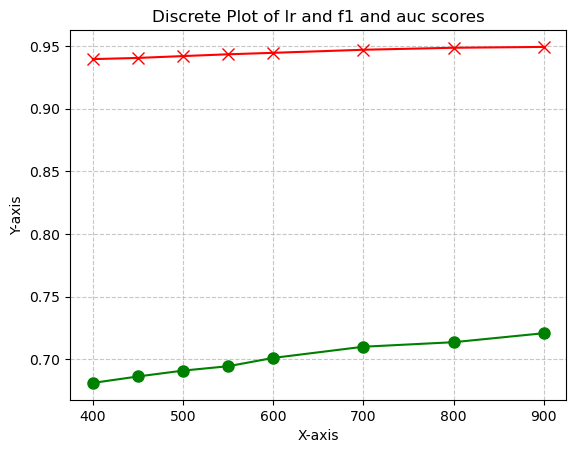

In [51]:
import catboost
from catboost import CatBoostClassifier

# Assume 'X' is your feature matrix and 'y' is your target variable
X = merged_imputed.drop('isFraud',axis=1)
y = merged_imputed['isFraud']
trial = 0
f1score = []
auc_roc = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

iteration = [400,450,500,550,600,700,800,900]

for iterations in iteration:
    
    trial+=1
    print("Trial number:",trial,'\n')
    print("iterations:",iterations,'\n')
    
    # Create a CatBoost classifier
    model = CatBoostClassifier(iterations=iterations,  # Adjust as needed
                               learning_rate=0.73,  # Adjust as needed
                               loss_function='Logloss',  # Classification task
                              ) 

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:,1]

    # Evaluate the model

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Calculate precision, recall, and F1 score
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    f1score.append(f1)

    auc = roc_auc_score(y_test, y_pred_proba)
    auc_roc.append(auc)
    print("AUC Score:", auc,'\n')

# Create a discrete plot
plt.plot(iteration, f1score, marker='o', linestyle='-', color='g', markersize=8)
plt.plot(iteration, auc_roc, marker='x', linestyle='-', color='r', markersize=8)

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Discrete Plot of lr and f1 and auc scores')

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Add annotations for each point
for i, txt in enumerate(y):
    plt.annotate(txt, (x[i], y[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Show the plot
plt.show()


Trial number: 1 

iterations: 900 

Confusion Matrix:
[[110135   3731]
 [   890   3352]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98    113866
           1       0.47      0.79      0.59      4242

    accuracy                           0.96    118108
   macro avg       0.73      0.88      0.79    118108
weighted avg       0.97      0.96      0.97    118108

Precision: 0.47324579980234366
Recall: 0.7901933050447902
F1 Score: 0.5919646799116999
AUC Score: 0.9504323004948545 

Trial number: 2 

iterations: 900 

Confusion Matrix:
[[110428   3438]
 [   897   3345]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98    113866
           1       0.49      0.79      0.61      4242

    accuracy                           0.96    118108
   macro avg       0.74      0.88      0.79    118108
weighted avg       0.97      0.96      0.97    118108

P

NameError: name 'x' is not defined

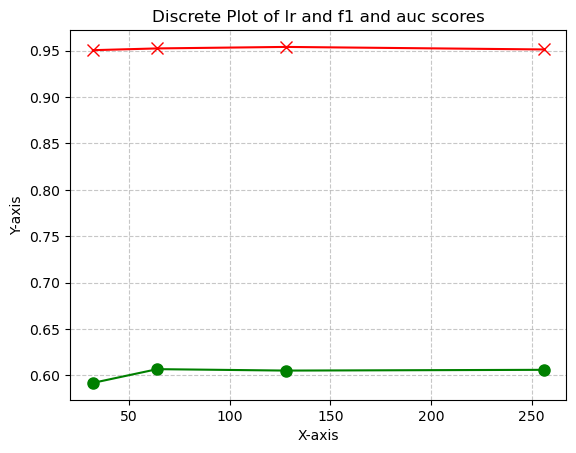

In [52]:
import catboost
from catboost import CatBoostClassifier

# Assume 'X' is your feature matrix and 'y' is your target variable
X = merged_imputed.drop('isFraud',axis=1)
y = merged_imputed['isFraud']
trial = 0
f1score = []
auc_roc = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

border = [32,64,128,256]

for bc in border:
    
    trial+=1
    print("Trial number:",trial,'\n')
    print("iterations:",iterations,'\n')
    
    # Create a CatBoost classifier
    model = CatBoostClassifier(iterations=900,
                               border_count=bc,
                               learning_rate=0.73,  # Adjust as needed
                               loss_function='Logloss',  # Classification task
                               thread_count=-1, 
                               verbose=0, 
                               eval_metric='F1', 
                               auto_class_weights='Balanced'
                              ) 

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:,1]

    # Evaluate the model

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Calculate precision, recall, and F1 score
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    f1score.append(f1)

    auc = roc_auc_score(y_test, y_pred_proba)
    auc_roc.append(auc)
    print("AUC Score:", auc,'\n')

# Create a discrete plot
plt.plot(border, f1score, marker='o', linestyle='-', color='g', markersize=8)
plt.plot(border, auc_roc, marker='x', linestyle='-', color='r', markersize=8)

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Discrete Plot of lr and f1 and auc scores')

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Add annotations for each point
for i, txt in enumerate(y):
    plt.annotate(txt, (x[i], y[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Show the plot
plt.show()


Trial number: 1 

iterations: 900 

Confusion Matrix:
[[113568    298]
 [  1629   2613]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    113866
           1       0.90      0.62      0.73      4242

    accuracy                           0.98    118108
   macro avg       0.94      0.81      0.86    118108
weighted avg       0.98      0.98      0.98    118108

Precision: 0.8976296805221573
Recall: 0.615983026874116
F1 Score: 0.7306025443869705
AUC Score: 0.9498996046893106 



ValueError: x and y must have same first dimension, but have shapes (4,) and (1,)

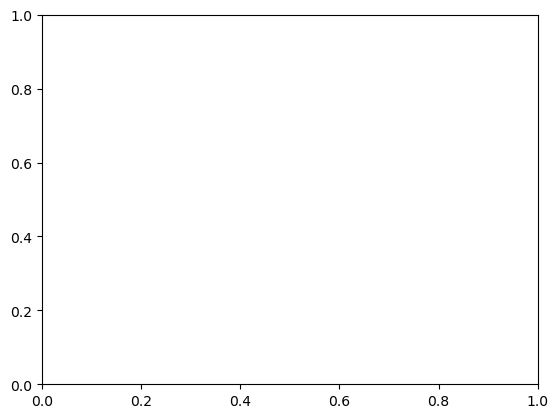

In [61]:
import catboost
from catboost import CatBoostClassifier

# Assume 'X' is your feature matrix and 'y' is your target variable
X = merged_imputed.drop('isFraud',axis=1)
y = merged_imputed['isFraud']
trial = 0
f1score = []
auc_roc = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

l2_leaf_reg = [1]

for bc in l2_leaf_reg:
    
    trial+=1
    print("Trial number:",trial,'\n')
    print("iterations:",iterations,'\n')
    
    # Create a CatBoost classifier
    model = CatBoostClassifier(iterations=900,
                               l2_leaf_reg=1,
                               border_count=64,
                               learning_rate=0.73,  # Adjust as needed
                               loss_function='Logloss',  # Classification task
                               thread_count=-1, 
                               verbose=0, 
                               eval_metric='F1'
                              ) 

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:,1]

    # Evaluate the model

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Calculate precision, recall, and F1 score
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    f1score.append(f1)

    auc = roc_auc_score(y_test, y_pred_proba)
    auc_roc.append(auc)
    print("AUC Score:", auc,'\n')

# Create a discrete plot
plt.plot(border, f1score, marker='o', linestyle='-', color='g', markersize=8)
plt.plot(border, auc_roc, marker='x', linestyle='-', color='r', markersize=8)

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Discrete Plot of lr and f1 and auc scores')

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [ ]:
F1 Score: 0.7339627881144126
AUC Score: 0.947267360420749 

In [62]:
# Calculate class weights for handling imbalance
class_counts = y_train.value_counts()
class_weights = len(y_train) / (len(class_counts) * class_counts)

# Create a CatBoost classifier with class_weights
model = CatBoostClassifier(iterations=900,
                           l2_leaf_reg=1,
                           depth=16,
                           border_count=64,
                           learning_rate=0.73,  # Adjust as needed
                           loss_function='Logloss',  # Classification task
                           thread_count=-1,
                           eval_metric='F1'
                              ) 
# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_proba)

# Evaluate the model
report = classification_report(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print(f'AUC Score: {auc_score:.4f}')
print('\nClassification Report:\n', report)

0:	learn: 0.2300240	total: 3.27s	remaining: 48m 58s
1:	learn: 0.4740326	total: 6.72s	remaining: 50m 19s
2:	learn: 0.5316979	total: 9.92s	remaining: 49m 27s
3:	learn: 0.6163910	total: 13.3s	remaining: 49m 36s
4:	learn: 0.6831279	total: 16.7s	remaining: 49m 58s
5:	learn: 0.7161067	total: 20.1s	remaining: 50m
6:	learn: 0.7346969	total: 23.5s	remaining: 49m 55s
7:	learn: 0.7493476	total: 26.8s	remaining: 49m 50s
8:	learn: 0.7647860	total: 30.1s	remaining: 49m 38s
9:	learn: 0.7932152	total: 33.6s	remaining: 49m 47s
10:	learn: 0.8041421	total: 36.9s	remaining: 49m 40s


KeyboardInterrupt: 

In [63]:

model = CatBoostClassifier(iterations=1000,
                           l2_leaf_reg=1,
                           depth=15,
                           border_count=64,
                           learning_rate=0.73,  # Adjust as needed
                           loss_function='Logloss',  # Classification task
                           thread_count=-1,
                           eval_metric='F1'
                              ) 
# Train the model
model.fit(X, y)

# Make predictions on the test set
y_pred = model.predict(merged_test_imputed)
y_proba = model.predict_proba(merged_test_imputed)[:, 1]  # Probability estimates for the positive class

y_ = pd.DataFrame(y_pred_proba)
output = pd.concat([merged_test_imputed['TransactionID'],y_],axis=1)
output.to_csv('Output.csv')

0:	learn: 0.3443364	total: 3.7s	remaining: 1h 1m 36s
1:	learn: 0.4901395	total: 7.47s	remaining: 1h 2m 6s
2:	learn: 0.5746170	total: 11s	remaining: 1h 1m 8s
3:	learn: 0.6355622	total: 14.7s	remaining: 1h 49s
4:	learn: 0.6839273	total: 18.3s	remaining: 1h 34s
5:	learn: 0.7220873	total: 21.9s	remaining: 1h 33s
6:	learn: 0.7442522	total: 25.6s	remaining: 1h 25s
7:	learn: 0.7648397	total: 29.2s	remaining: 1h 20s
8:	learn: 0.7763089	total: 32.7s	remaining: 59m 56s
9:	learn: 0.7853237	total: 36.2s	remaining: 59m 46s
10:	learn: 0.7984852	total: 39.8s	remaining: 59m 40s
11:	learn: 0.8022034	total: 43.3s	remaining: 59m 28s
12:	learn: 0.8069213	total: 46.9s	remaining: 59m 20s
13:	learn: 0.8153257	total: 50.5s	remaining: 59m 18s
14:	learn: 0.8179061	total: 54.1s	remaining: 59m 12s
15:	learn: 0.8253046	total: 57.7s	remaining: 59m 8s
16:	learn: 0.8319475	total: 1m 1s	remaining: 59m 2s
17:	learn: 0.8401955	total: 1m 4s	remaining: 59m
18:	learn: 0.8531530	total: 1m 8s	remaining: 58m 57s
19:	learn: 0.

153:	learn: 0.9978904	total: 9m 13s	remaining: 50m 40s
154:	learn: 0.9978903	total: 9m 17s	remaining: 50m 37s
155:	learn: 0.9980122	total: 9m 20s	remaining: 50m 33s
156:	learn: 0.9979879	total: 9m 24s	remaining: 50m 30s
157:	learn: 0.9979636	total: 9m 27s	remaining: 50m 26s
158:	learn: 0.9980365	total: 9m 31s	remaining: 50m 22s
159:	learn: 0.9980851	total: 9m 35s	remaining: 50m 18s
160:	learn: 0.9980851	total: 9m 38s	remaining: 50m 15s
161:	learn: 0.9980365	total: 9m 42s	remaining: 50m 11s
162:	learn: 0.9981821	total: 9m 45s	remaining: 50m 8s
163:	learn: 0.9982307	total: 9m 49s	remaining: 50m 4s
164:	learn: 0.9983035	total: 9m 52s	remaining: 50m
165:	learn: 0.9984006	total: 9m 56s	remaining: 49m 57s
166:	learn: 0.9984735	total: 10m	remaining: 49m 53s
167:	learn: 0.9985706	total: 10m 3s	remaining: 49m 49s
168:	learn: 0.9985706	total: 10m 7s	remaining: 49m 46s
169:	learn: 0.9985463	total: 10m 10s	remaining: 49m 42s
170:	learn: 0.9984978	total: 10m 14s	remaining: 49m 38s
171:	learn: 0.998

301:	learn: 0.9989584	total: 17m 3s	remaining: 39m 25s
302:	learn: 0.9989584	total: 17m 6s	remaining: 39m 21s
303:	learn: 0.9989584	total: 17m 9s	remaining: 39m 16s
304:	learn: 0.9989584	total: 17m 12s	remaining: 39m 12s
305:	learn: 0.9989584	total: 17m 15s	remaining: 39m 7s
306:	learn: 0.9989584	total: 17m 18s	remaining: 39m 3s
307:	learn: 0.9989584	total: 17m 21s	remaining: 38m 58s
308:	learn: 0.9989584	total: 17m 23s	remaining: 38m 54s
309:	learn: 0.9989584	total: 17m 26s	remaining: 38m 49s
310:	learn: 0.9989584	total: 17m 29s	remaining: 38m 45s
311:	learn: 0.9989584	total: 17m 32s	remaining: 38m 40s
312:	learn: 0.9989584	total: 17m 35s	remaining: 38m 36s
313:	learn: 0.9989584	total: 17m 38s	remaining: 38m 32s
314:	learn: 0.9989584	total: 17m 41s	remaining: 38m 27s
315:	learn: 0.9989584	total: 17m 44s	remaining: 38m 23s
316:	learn: 0.9989584	total: 17m 46s	remaining: 38m 18s
317:	learn: 0.9989584	total: 17m 50s	remaining: 38m 14s
318:	learn: 0.9989584	total: 17m 52s	remaining: 38m 1

449:	learn: 0.9989584	total: 24m 8s	remaining: 29m 29s
450:	learn: 0.9989584	total: 24m 10s	remaining: 29m 26s
451:	learn: 0.9989584	total: 24m 13s	remaining: 29m 22s
452:	learn: 0.9989584	total: 24m 16s	remaining: 29m 18s
453:	learn: 0.9989584	total: 24m 19s	remaining: 29m 15s
454:	learn: 0.9989584	total: 24m 22s	remaining: 29m 11s
455:	learn: 0.9989584	total: 24m 25s	remaining: 29m 7s
456:	learn: 0.9989584	total: 24m 28s	remaining: 29m 4s
457:	learn: 0.9989584	total: 24m 30s	remaining: 29m
458:	learn: 0.9989584	total: 24m 33s	remaining: 28m 57s
459:	learn: 0.9989584	total: 24m 36s	remaining: 28m 53s
460:	learn: 0.9989584	total: 24m 39s	remaining: 28m 49s
461:	learn: 0.9989584	total: 24m 42s	remaining: 28m 46s
462:	learn: 0.9989584	total: 24m 44s	remaining: 28m 42s
463:	learn: 0.9989584	total: 24m 47s	remaining: 28m 38s
464:	learn: 0.9989584	total: 24m 50s	remaining: 28m 35s
465:	learn: 0.9989584	total: 24m 53s	remaining: 28m 31s
466:	learn: 0.9989584	total: 24m 56s	remaining: 28m 27s

597:	learn: 0.9989584	total: 31m 10s	remaining: 20m 57s
598:	learn: 0.9989584	total: 31m 13s	remaining: 20m 53s
599:	learn: 0.9989584	total: 31m 16s	remaining: 20m 50s
600:	learn: 0.9989584	total: 31m 18s	remaining: 20m 47s
601:	learn: 0.9989584	total: 31m 21s	remaining: 20m 44s
602:	learn: 0.9989584	total: 31m 24s	remaining: 20m 40s
603:	learn: 0.9989584	total: 31m 27s	remaining: 20m 37s
604:	learn: 0.9989584	total: 31m 30s	remaining: 20m 34s
605:	learn: 0.9989584	total: 31m 33s	remaining: 20m 30s
606:	learn: 0.9989584	total: 31m 36s	remaining: 20m 27s
607:	learn: 0.9989584	total: 31m 38s	remaining: 20m 24s
608:	learn: 0.9989584	total: 31m 41s	remaining: 20m 21s
609:	learn: 0.9989584	total: 31m 44s	remaining: 20m 17s
610:	learn: 0.9989584	total: 31m 47s	remaining: 20m 14s
611:	learn: 0.9989584	total: 31m 50s	remaining: 20m 11s
612:	learn: 0.9989584	total: 31m 53s	remaining: 20m 7s
613:	learn: 0.9989584	total: 31m 56s	remaining: 20m 4s
614:	learn: 0.9989584	total: 31m 59s	remaining: 20

745:	learn: 0.9989584	total: 38m 14s	remaining: 13m 1s
746:	learn: 0.9989584	total: 38m 16s	remaining: 12m 57s
747:	learn: 0.9989584	total: 38m 19s	remaining: 12m 54s
748:	learn: 0.9989584	total: 38m 22s	remaining: 12m 51s
749:	learn: 0.9989584	total: 38m 25s	remaining: 12m 48s
750:	learn: 0.9989584	total: 38m 28s	remaining: 12m 45s
751:	learn: 0.9989584	total: 38m 30s	remaining: 12m 42s
752:	learn: 0.9989584	total: 38m 33s	remaining: 12m 38s
753:	learn: 0.9989584	total: 38m 36s	remaining: 12m 35s
754:	learn: 0.9989584	total: 38m 39s	remaining: 12m 32s
755:	learn: 0.9989584	total: 38m 41s	remaining: 12m 29s
756:	learn: 0.9989584	total: 38m 44s	remaining: 12m 26s
757:	learn: 0.9989584	total: 38m 47s	remaining: 12m 22s
758:	learn: 0.9989584	total: 38m 49s	remaining: 12m 19s
759:	learn: 0.9989584	total: 38m 52s	remaining: 12m 16s
760:	learn: 0.9989584	total: 38m 55s	remaining: 12m 13s
761:	learn: 0.9989584	total: 38m 58s	remaining: 12m 10s
762:	learn: 0.9989584	total: 39m	remaining: 12m 7

895:	learn: 0.9989584	total: 45m 11s	remaining: 5m 14s
896:	learn: 0.9989584	total: 45m 14s	remaining: 5m 11s
897:	learn: 0.9989584	total: 45m 17s	remaining: 5m 8s
898:	learn: 0.9989585	total: 45m 20s	remaining: 5m 5s
899:	learn: 0.9989585	total: 45m 23s	remaining: 5m 2s
900:	learn: 0.9989585	total: 45m 25s	remaining: 4m 59s
901:	learn: 0.9989585	total: 45m 28s	remaining: 4m 56s
902:	learn: 0.9989585	total: 45m 31s	remaining: 4m 53s
903:	learn: 0.9989585	total: 45m 34s	remaining: 4m 50s
904:	learn: 0.9989585	total: 45m 36s	remaining: 4m 47s
905:	learn: 0.9989585	total: 45m 39s	remaining: 4m 44s
906:	learn: 0.9989585	total: 45m 42s	remaining: 4m 41s
907:	learn: 0.9989585	total: 45m 45s	remaining: 4m 38s
908:	learn: 0.9989585	total: 45m 47s	remaining: 4m 35s
909:	learn: 0.9989585	total: 45m 50s	remaining: 4m 32s
910:	learn: 0.9989585	total: 45m 53s	remaining: 4m 28s
911:	learn: 0.9989585	total: 45m 55s	remaining: 4m 25s
912:	learn: 0.9989585	total: 45m 58s	remaining: 4m 22s
913:	learn: 0

In [67]:
y_ = pd.DataFrame(y_proba)
output = pd.concat([merged_test_imputed['TransactionID'],y_],axis=1)
output.to_csv('Output.csv')

In [68]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score


# Create a Decision Tree as a weak learner
base_classifier = BalancedRandomForestClassifier(bootstrap=False, min_samples_split=2, min_samples_leaf=1, n_estimators = 138, max_depth = 20, random_state=42)

# Create an AdaBoost classifier with class_weights
model = AdaBoostClassifier(base_classifier,
                           n_estimators=50,  # Adjust as needed
                           learning_rate=0.73,  # Adjust as needed
                           algorithm='SAMME.R',  # 'SAMME' for discrete, 'SAMME.R' for real
                           random_state=42
                           )

# Train the model
%time model.fit(X, y)

# Make predictions on the test set
y_pred = model.predict(merged_test_imputed)
y_proba = model.predict_proba(merged_test_imputed)[:, 1]  # Probability estimates for the positive class

y_ = pd.DataFrame(y_proba)
output = pd.concat([merged_test_imputed['TransactionID'],y_],axis=1)
output.to_csv('Output.csv')

Private = 0.888303, public = 0.913932m

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

X = merged_imputed.drop('isFraud',axis=1)
y = merged_imputed['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create a Decision Tree as a weak learner
base_classifier = BalancedRandomForestClassifier(bootstrap=False, min_samples_split=2, min_samples_leaf=1, n_estimators = 138, max_depth = 20, random_state=42)

# Create an AdaBoost classifier with class_weights
model = AdaBoostClassifier(base_classifier,
                           n_estimators=200,  # Adjust as needed
                           learning_rate=1,  # Adjust as needed
                           algorithm='SAMME.R',  # 'SAMME' for discrete, 'SAMME.R' for real
                           random_state=42
                           )

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(merged_test_imputed)
y_pred_proba = model.predict_proba(merged_test_imputed)[:, 1]  # Probability estimates for the positive class

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
f1score.append(f1)

auc = roc_auc_score(y_test, y_pred_proba)
auc_roc.append(auc)
print("AUC Score:", auc,'\n')

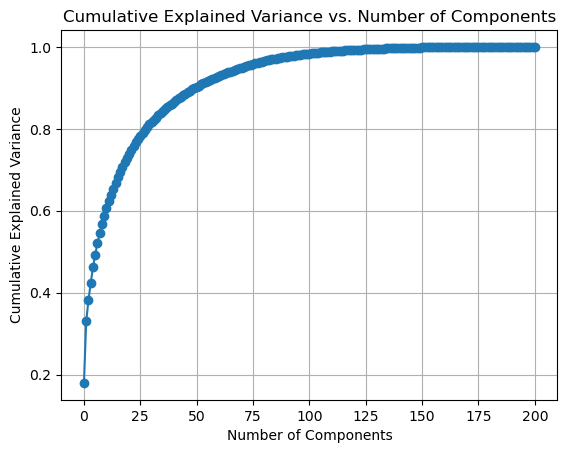

Optimal Number of Components: 72


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assume 'X' is your feature matrix and 'y' is your target variable
X = merged_imputed.drop('isFraud',axis=1)
y = merged_imputed['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (important for PCA)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit PCA to the standardized training data
pca = PCA()
pca.fit(X_train_scaled)

# Plot the cumulative explained variance ratio
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.plot(cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

# Find the optimal number of components based on the explained variance
optimal_components = np.argmax(cumulative_explained_variance >= 0.95) + 1
print(f"Optimal Number of Components: {optimal_components}")

# Use the optimal number of components for PCA transformation
pca_optimal = PCA(n_components=optimal_components)
X_train_pca = pca_optimal.fit_transform(X_train_scaled)
X_test_pca = pca_optimal.transform(X_test_scaled)


In [23]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Example: Balanced Random Forest
model = BalancedRandomForestClassifier(bootstrap=False, random_state=42)
model.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_pca)
y_pred_proba = model.predict_proba(X_test_pca)[:, 1]

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

auc = roc_auc_score(y_test, y_pred_proba)
print("AUC Score:", auc)

Confusion Matrix:
[[97045 16821]
 [  766  3476]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.85      0.92    113866
           1       0.17      0.82      0.28      4242

    accuracy                           0.85    118108
   macro avg       0.58      0.84      0.60    118108
weighted avg       0.96      0.85      0.89    118108

Precision: 0.17125683598561364
Recall: 0.8194247996228194
F1 Score: 0.2833041281225804
AUC Score: 0.9129807973909595


In [31]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


# Use the optimal number of components for PCA transformation
pca_optimal = PCA(n_components=72)
X_train_pca = pca_optimal.fit_transform(X_train_scaled)
X_test_pca = pca_optimal.transform(X_test_scaled)


# Example: Balanced Random Forest
%time model = BalancedRandomForestClassifier(bootstrap=False, random_state=42)
%time model.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_pca)
y_pred_proba = model.predict_proba(X_test_pca)[:, 1]

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

auc = roc_auc_score(y_test, y_pred_proba)
print("AUC Score:", auc)

CPU times: total: 31.2 ms
Wall time: 13 ms
CPU times: total: 49 s
Wall time: 48.8 s
Confusion Matrix:
[[95567 18299]
 [  789  3453]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.84      0.91    113866
           1       0.16      0.81      0.27      4242

    accuracy                           0.84    118108
   macro avg       0.58      0.83      0.59    118108
weighted avg       0.96      0.84      0.89    118108

Precision: 0.15874402353806547
Recall: 0.814002828854314
F1 Score: 0.2656766946218358
AUC Score: 0.9060731849598839


In [39]:
import catboost
from catboost import CatBoostClassifier

# Use the optimal number of components for PCA transformation
pca_optimal = PCA(n_components=72)
X_train_pca = pca_optimal.fit_transform(X_train_scaled)
X_test_pca = pca_optimal.transform(X_test_scaled)
trial = 0
lr = [1]

for lr in lr:
    
    trial+=1
    print("Trial number:",trial,'\n')
    print("learning rate:",lr,'\n')
    
    # Create a CatBoost classifier
    %time model = CatBoostClassifier(iterations=500, learning_rate=0.73, loss_function='Logloss', depth = 11) 

    # Train the model
    %time model.fit(X_train_pca, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test_pca)
    y_pred_proba = model.predict_proba(X_test_pca)[:,1]

    # Evaluate the model

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Calculate precision, recall, and F1 score
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

    auc = roc_auc_score(y_test, y_pred_proba)
    print("AUC Score:", auc,'\n')

Trial number: 1 

learning rate: 1 

CPU times: total: 93.8 ms
Wall time: 18 ms
0:	learn: 0.1436154	total: 522ms	remaining: 4m 20s
1:	learn: 0.1213350	total: 854ms	remaining: 3m 32s
2:	learn: 0.1111662	total: 1.29s	remaining: 3m 33s
3:	learn: 0.1081077	total: 1.63s	remaining: 3m 21s
4:	learn: 0.1052327	total: 1.97s	remaining: 3m 14s
5:	learn: 0.1019757	total: 2.34s	remaining: 3m 12s
6:	learn: 0.0988536	total: 2.72s	remaining: 3m 11s
7:	learn: 0.0971280	total: 3.05s	remaining: 3m 7s
8:	learn: 0.0940108	total: 3.48s	remaining: 3m 9s
9:	learn: 0.0920290	total: 3.84s	remaining: 3m 8s
10:	learn: 0.0900915	total: 4.21s	remaining: 3m 6s
11:	learn: 0.0888934	total: 4.55s	remaining: 3m 5s
12:	learn: 0.0869380	total: 4.95s	remaining: 3m 5s
13:	learn: 0.0849591	total: 5.34s	remaining: 3m 5s
14:	learn: 0.0836389	total: 5.71s	remaining: 3m 4s
15:	learn: 0.0816347	total: 6.12s	remaining: 3m 5s
16:	learn: 0.0803846	total: 6.51s	remaining: 3m 4s
17:	learn: 0.0793224	total: 6.92s	remaining: 3m 5s
18:	l

157:	learn: 0.0160380	total: 1m 3s	remaining: 2m 16s
158:	learn: 0.0160059	total: 1m 3s	remaining: 2m 16s
159:	learn: 0.0159346	total: 1m 3s	remaining: 2m 15s
160:	learn: 0.0158033	total: 1m 4s	remaining: 2m 15s
161:	learn: 0.0157197	total: 1m 4s	remaining: 2m 14s
162:	learn: 0.0155977	total: 1m 4s	remaining: 2m 14s
163:	learn: 0.0154820	total: 1m 5s	remaining: 2m 13s
164:	learn: 0.0153436	total: 1m 5s	remaining: 2m 13s
165:	learn: 0.0152153	total: 1m 5s	remaining: 2m 12s
166:	learn: 0.0150719	total: 1m 6s	remaining: 2m 12s
167:	learn: 0.0149726	total: 1m 6s	remaining: 2m 11s
168:	learn: 0.0148839	total: 1m 7s	remaining: 2m 11s
169:	learn: 0.0147706	total: 1m 7s	remaining: 2m 10s
170:	learn: 0.0145462	total: 1m 7s	remaining: 2m 10s
171:	learn: 0.0144352	total: 1m 8s	remaining: 2m 10s
172:	learn: 0.0143200	total: 1m 8s	remaining: 2m 9s
173:	learn: 0.0142990	total: 1m 8s	remaining: 2m 9s
174:	learn: 0.0141728	total: 1m 9s	remaining: 2m 8s
175:	learn: 0.0141013	total: 1m 9s	remaining: 2m 

310:	learn: 0.0059805	total: 1m 57s	remaining: 1m 11s
311:	learn: 0.0059262	total: 1m 58s	remaining: 1m 11s
312:	learn: 0.0059048	total: 1m 58s	remaining: 1m 10s
313:	learn: 0.0058824	total: 1m 58s	remaining: 1m 10s
314:	learn: 0.0058514	total: 1m 59s	remaining: 1m 9s
315:	learn: 0.0058105	total: 1m 59s	remaining: 1m 9s
316:	learn: 0.0057820	total: 1m 59s	remaining: 1m 9s
317:	learn: 0.0057621	total: 2m	remaining: 1m 8s
318:	learn: 0.0057341	total: 2m	remaining: 1m 8s
319:	learn: 0.0056916	total: 2m	remaining: 1m 8s
320:	learn: 0.0056700	total: 2m 1s	remaining: 1m 7s
321:	learn: 0.0056631	total: 2m 1s	remaining: 1m 7s
322:	learn: 0.0056556	total: 2m 1s	remaining: 1m 6s
323:	learn: 0.0056312	total: 2m 2s	remaining: 1m 6s
324:	learn: 0.0056010	total: 2m 2s	remaining: 1m 6s
325:	learn: 0.0055656	total: 2m 3s	remaining: 1m 5s
326:	learn: 0.0055367	total: 2m 3s	remaining: 1m 5s
327:	learn: 0.0055063	total: 2m 3s	remaining: 1m 4s
328:	learn: 0.0054699	total: 2m 4s	remaining: 1m 4s
329:	learn

466:	learn: 0.0029760	total: 2m 54s	remaining: 12.3s
467:	learn: 0.0029658	total: 2m 54s	remaining: 12s
468:	learn: 0.0029512	total: 2m 55s	remaining: 11.6s
469:	learn: 0.0029207	total: 2m 55s	remaining: 11.2s
470:	learn: 0.0029101	total: 2m 56s	remaining: 10.8s
471:	learn: 0.0028896	total: 2m 56s	remaining: 10.5s
472:	learn: 0.0028801	total: 2m 56s	remaining: 10.1s
473:	learn: 0.0028749	total: 2m 57s	remaining: 9.72s
474:	learn: 0.0028643	total: 2m 57s	remaining: 9.35s
475:	learn: 0.0028547	total: 2m 57s	remaining: 8.97s
476:	learn: 0.0028441	total: 2m 58s	remaining: 8.6s
477:	learn: 0.0028338	total: 2m 58s	remaining: 8.23s
478:	learn: 0.0028234	total: 2m 59s	remaining: 7.85s
479:	learn: 0.0028063	total: 2m 59s	remaining: 7.48s
480:	learn: 0.0027989	total: 2m 59s	remaining: 7.11s
481:	learn: 0.0027928	total: 3m	remaining: 6.73s
482:	learn: 0.0027902	total: 3m	remaining: 6.36s
483:	learn: 0.0027721	total: 3m	remaining: 5.98s
484:	learn: 0.0027678	total: 3m 1s	remaining: 5.61s
485:	lear